# Home Credit Default Risk (HCDR)

The course project is based on the [Home Credit Default Risk (HCDR)  Kaggle Competition](https://www.kaggle.com/c/home-credit-default-risk/). The goal of this project is to predict whether or not a client will repay a loan. In order to make sure that people who struggle to get loans due to insufficient or non-existent credit histories have a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.


## Some of the challenges

1. Dataset size 
   * (688 meg uncompressed) with millions of rows of data
   * 2.71 Gig of data uncompressed
* Dealing with missing data
* Imbalanced datasets
* Summarizing transaction data


# Kaggle API setup
Kaggle is a Data Science Competition Platform which shares a lot of datasets. In the past, it was troublesome to submit your result as your have to go through the console in your browser and drag your files there. Now you can interact with Kaggle via the command line. E.g., 

```bash
! kaggle competitions files home-credit-default-risk
```

It is quite easy to setup, it takes me less than 15 minutes to finish a submission.

1. Install library
* Create a API Token (edit your profile on [Kaggle.com](https://www.kaggle.com/)); this produces `kaggle.json` file
* Put your JSON `kaggle.json` in the right place
* Access competition files; make submissions via the command (see examples below)
* Submit result

For more detailed information on setting the Kaggle API see [here](https://medium.com/@nokkk/make-your-kaggle-submissions-with-kaggle-official-api-f49093c04f8a) and [here](https://github.com/Kaggle/kaggle-api).



In [8]:
!pip install kaggle

    100% |████████████████████████████████| 61kB 2.8MB/s ta 0:00:011
    100% |████████████████████████████████| 61kB 5.5MB/s ta 0:00:011
    100% |████████████████████████████████| 81kB 53.9MB/s ta 0:00:01
  Running setup.py bdist_wheel for kaggle ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/57/4e/e8/bb28d035162fb8f17f8ca5d42c3230e284c6aa565b42b72674
  Running setup.py bdist_wheel for python-slugify ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/11/94/81/312969455540cb0e6a773e5d68a73c14128bfdfd4a7969bb4f
Successfully built kaggle python-slugify
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
!pwd


/home/ec2-user/SageMaker/Unit-Project-Home-Credit-Default-Risk


In [ ]:
!mkdir /home/ec2-user/SageMaker/Unit-Project-Home-Credit-Default-Risk/.kaggle

In [30]:
!cp /home/ec2-user/SageMaker/Unit-Project-Home-Credit-Default-Risk/kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [34]:
! kaggle competitions files ./.kaggle

404 - Not Found


# Dataset and how to download


## Back ground Home Credit Group

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

### Home Credit Group

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


## Background on the dataset
Home Credit is a non-banking financial institution, founded in 1997 in the Czech Republic.

The company operates in 14 countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history which will either not obtain loans or became victims of untrustworthly lenders.

Home Credit group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loans, with the majority in Asia and and almost half of them in China (as of 19-05-2018).

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

## Data files overview
There are 7 different sources of data:

* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.
* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

![alt](home_credit.png "Home credit")

## Downloading the files via Kaggle API

Create a base directory:

```bash
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
```

Please download the project data files and data dictionary and unzip them using either of the following approaches:

1. Click on the `Download` button on the following [Data Webpage](https://www.kaggle.com/c/home-credit-default-risk/data) and unzip the  zip file to the `BASE_DIR`
2. If you plan to use the Kaggle API, please use the following steps.


In [13]:
DATA_DIR = "../../../Data/home-credit-default-risk"   #same level as course repo in the data directory
#DATA_DIR = os.path.join('./ddddd/')
!mkdir $DATA_DIR

mkdir: cannot create directory ‘../../../Data/home-credit-default-risk’: No such file or directory


In [14]:
!ls -l $DATA_DIR

ls: cannot access ../../../Data/home-credit-default-risk: No such file or directory


In [15]:
! kaggle competitions download home-credit-default-risk -p $DATA_DIR

Traceback (most recent call last):
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/bin/kaggle", line 7, in <module>
    from kaggle.cli import main
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/kaggle/api/kaggle_api_extended.py", line 149, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /home/ec2-user/.kaggle. Or use the environment method.


### Imports

In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
import pickle
from sklearn.base import BaseEstimator, TransformerMixin

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

import plotly
plotly.offline.init_notebook_mode(connected=True)

In [44]:
unzippingReq = False
if unzippingReq: #please modify this code 
    zip_ref = zipfile.ZipFile('application_train.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('application_test.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('bureau.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('credit_card_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('installments_payments.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('POS_CASH_balance.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()
    zip_ref = zipfile.ZipFile('previous_application.csv.zip', 'r')
    zip_ref.extractall('datasets')
    zip_ref.close()

## Data files overview
### Data Dictionary

As part of the data download comes a  Data Dictionary. It named `HomeCredit_columns_description.csv`

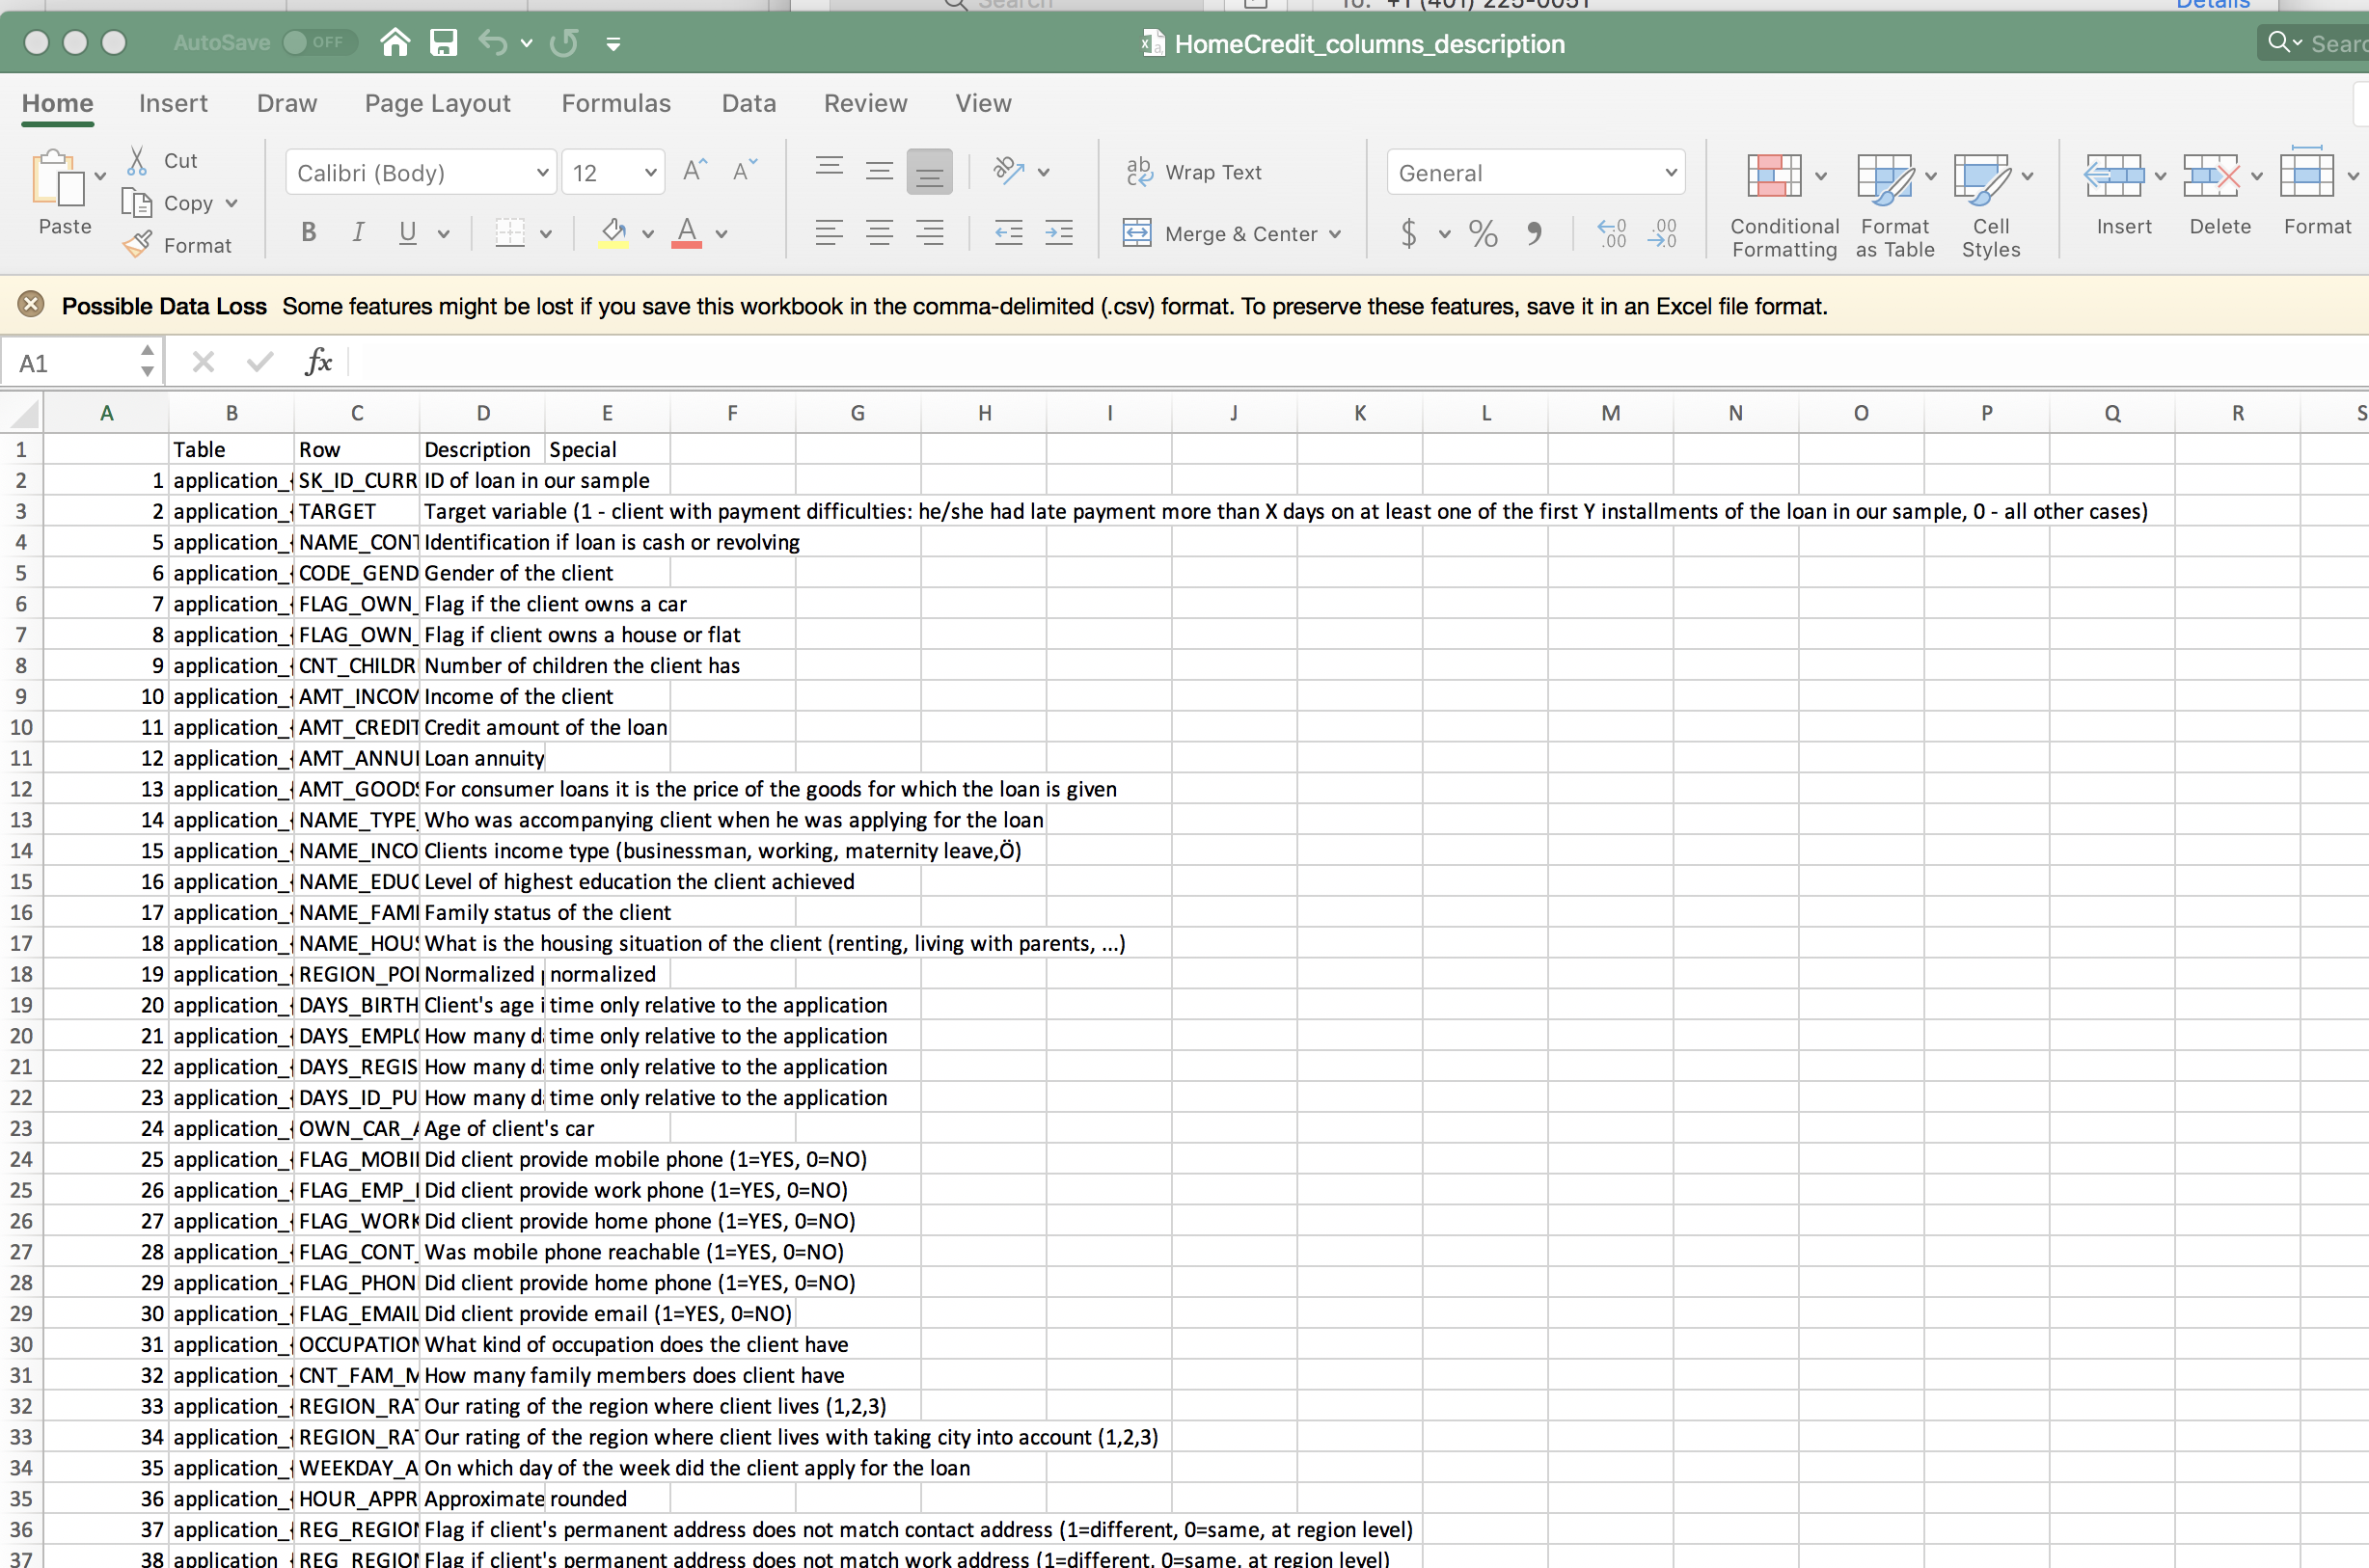

### Application train

In [5]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [8]:
def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(5))
    return df

DATA_DIR = "/home/ec2-user/SageMaker/Unit-Project-Home-Credit-Default-Risk"
datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
ds_name = 'application_train'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

datasets['application_train'].shape

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

(307511, 122)

### Application test


* __application_train/application_test:__ the main training and testing data with information about each loan application at Home Credit. Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating __0: the loan was repaid__ or __1: the loan was not repaid__. The target variable defines if the client had payment difficulties meaning he/she had late payment more than X days on at least one of the first Y installments of the loan. Such case is marked as 1 while other all other cases as 0.


In [46]:
ds_name = 'application_test'
datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

The application dataset has the most information about the client: Gender, income, family status, education ...

### The Other datasets

* __bureau:__ data concerning client's previous credits from other financial institutions. Each previous credit has its own row in bureau, but one loan in the application data can have multiple previous credits.
* __bureau_balance:__ monthly data about the previous credits in bureau. Each row is one month of a previous credit, and a single previous credit can have multiple rows, one for each month of the credit length.
* __previous_application:__ previous applications for loans at Home Credit of clients who have loans in the application data. Each current loan in the application data can have multiple previous loans. Each previous application has one row and is identified by the feature SK_ID_PREV.
* __POS_CASH_BALANCE:__ monthly data about previous point of sale or cash loans clients have had with Home Credit. Each row is one month of a previous point of sale or cash loan, and a single previous loan can have many rows.
* credit_card_balance: monthly data about previous credit cards clients have had with Home Credit. Each row is one month of a credit card balance, and a single credit card can have many rows.
* __installments_payment:__ payment history for previous loans at Home Credit. There is one row for every made payment and one row for every missed payment.

In [22]:
%%time
ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)


application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
SK_ID_BUREAU      int64
MONTHS_BALANCE    int64
STATUS            object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
SK_ID_PREV                    int64
SK_ID_CURR                    int64
MONTHS_BALANCE                int64
AMT_BALANCE                   float64
AMT_CREDIT_LIMIT_ACTUAL       int64
AMT_DRAWINGS_ATM_CURRENT      float64
AMT_DRAWINGS_CURRENT          float64
AMT_DRAWINGS_OTHER_CURRENT    float64
AMT_DRAWINGS_POS_CURRENT      float64
AMT_INST_MIN_REGULARITY       float64
AMT_PAYMENT_CURRENT           float64
AMT_PAYMENT_TOTAL_CURRENT     float64
AMT_RECEIVABLE_PRINCIPAL      float64
AMT_RECIVABLE                 float64
AMT_TOTAL_RECEIVABLE          float64
CNT_DRAWINGS_ATM_CURRENT      float64
CNT_DRAWINGS_CURRENT          int64
CNT_DRAWINGS_OTHER_CURRENT    float64
CNT_DRAWINGS_POS_CURRENT      float64
CNT_INSTALMENT_MATURE_CUM     float64
NAME_CONTRACT_STATUS          object
SK_DPD                        int64
SK_DPD_DEF          

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
SK_ID_PREV                int64
SK_ID_CURR                int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER     int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOS

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
SK_ID_PREV               int64
SK_ID_CURR               int64
MONTHS_BALANCE           int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS     object
SK_DPD                   int64
SK_DPD_DEF               int64
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

CPU times: user 45.1 s, sys: 5.6 s, total: 50.7 s
Wall time: 1min 31s


In [5]:
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


# Exploratory Data Analysis

## Summary of Application Train and Application Test Datasets

In [6]:
datasets["application_train"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [50]:
datasets["application_train"].describe() #numerical only features

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [51]:
datasets["application_train"].describe(include='all') #look at all categorical and numerical

SK_ID_CURR         TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
count   307511.000000  307511.000000             307511      307511   
unique            NaN            NaN                  2           3   
top               NaN            NaN         Cash loans           F   
freq              NaN            NaN             278232      202448   
mean    278180.518577       0.080729                NaN         NaN   
std     102790.175348       0.272419                NaN         NaN   
min     100002.000000       0.000000                NaN         NaN   
25%     189145.500000       0.000000                NaN         NaN   
50%     278202.000000       0.000000                NaN         NaN   
75%     367142.500000       0.000000                NaN         NaN   
max     456255.000000       1.000000                NaN         NaN   

       FLAG_OWN_CAR FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count        307511          307511  307511.000000      3.075110e+05   
unique            2               2            NaN               NaN   
top               N               Y            NaN               NaN   
freq         202924          213312            NaN               NaN   
mean            NaN             NaN       0.417052      1.687979e+05   
std             NaN             NaN       0.722121      2.371231e+05   
min             NaN             NaN       0.000000      2.565000e+04   
25%             NaN             NaN       0.000000      1.125000e+05   
50%             NaN             NaN       0.000000      1.471500e+05   
75%             NaN             NaN       1.000000      2.025000e+05   
max             NaN             NaN      19.000000      1.170000e+08   

          AMT_CREDIT    AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
count   3.075110e+05  307499.000000  ...     307511.000000    307511.000000   
unique           NaN            NaN  ...               NaN              NaN   
top              NaN            NaN  ...               NaN              NaN   
freq             NaN            NaN  ...               NaN              NaN   
mean    5.990260e+05   27108.573909  ...          0.008130         0.000595   
std     4.024908e+05   14493.737315  ...          0.089798         0.024387   
min     4.500000e+04    1615.500000  ...          0.000000         0.000000   
25%     2.700000e+05   16524.000000  ...          0.000000         0.000000   
50%     5.135310e+05   24903.000000  ...          0.000000         0.000000   
75%     8.086500e+05   34596.000000  ...          0.000000         0.000000   
max     4.050000e+06  258025.500000  ...          1.000000         1.000000   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000    307511.000000              265992.000000   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean           0.000507         0.000335                   0.006402   
std            0.022518         0.018299                   0.083849   
min            0.000000         0.000000                   0.000000   
25%            0.000000         0.000000                   0.000000   
50%            0.000000         0.000000                   0.000000   
75%            0.000000         0.000000                   0.000000   
max            1.000000         1.000000                   4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
unique                       NaN                         NaN   
top                          NaN                         NaN   
freq                         NaN                         NaN   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000           

## Missing Data for Application Train and Test

### Missing percentage and count in application train 

In [52]:
percent = (datasets["application_train"].isnull().sum()/datasets["application_train"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_train"].isna().sum().sort_values(ascending = False)
missing_application_train_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Train Missing Count"])
missing_application_train_data.head(20)

Percent  Train Missing Count
COMMONAREA_MEDI             69.87               214865
COMMONAREA_AVG              69.87               214865
COMMONAREA_MODE             69.87               214865
NONLIVINGAPARTMENTS_MODE    69.43               213514
NONLIVINGAPARTMENTS_MEDI    69.43               213514
NONLIVINGAPARTMENTS_AVG     69.43               213514
FONDKAPREMONT_MODE          68.39               210295
LIVINGAPARTMENTS_MEDI       68.35               210199
LIVINGAPARTMENTS_MODE       68.35               210199
LIVINGAPARTMENTS_AVG        68.35               210199
FLOORSMIN_MEDI              67.85               208642
FLOORSMIN_MODE              67.85               208642
FLOORSMIN_AVG               67.85               208642
YEARS_BUILD_MEDI            66.50               204488
YEARS_BUILD_AVG             66.50               204488
YEARS_BUILD_MODE            66.50               204488
OWN_CAR_AGE                 65.99               202929
LANDAREA_MODE               59.38               182590
LANDAREA_AVG                59.38               182590
LANDAREA_MEDI               59.38               182590

### Missing percentage and count in application test

In [53]:
percent = (datasets["application_test"].isnull().sum()/datasets["application_test"].isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = datasets["application_test"].isna().sum().sort_values(ascending = False)
missing_application_test_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Test Missing Count"])
missing_application_test_data.head(20)


Percent  Test Missing Count
COMMONAREA_MEDI             68.72               33495
COMMONAREA_AVG              68.72               33495
COMMONAREA_MODE             68.72               33495
NONLIVINGAPARTMENTS_MODE    68.41               33347
NONLIVINGAPARTMENTS_MEDI    68.41               33347
NONLIVINGAPARTMENTS_AVG     68.41               33347
FONDKAPREMONT_MODE          67.28               32797
LIVINGAPARTMENTS_AVG        67.25               32780
LIVINGAPARTMENTS_MEDI       67.25               32780
LIVINGAPARTMENTS_MODE       67.25               32780
FLOORSMIN_MEDI              66.61               32466
FLOORSMIN_MODE              66.61               32466
FLOORSMIN_AVG               66.61               32466
OWN_CAR_AGE                 66.29               32312
YEARS_BUILD_MEDI            65.28               31818
YEARS_BUILD_MODE            65.28               31818
YEARS_BUILD_AVG             65.28               31818
LANDAREA_AVG                57.96               28254
LANDAREA_MODE               57.96               28254
LANDAREA_MEDI               57.96               28254

### Proportion of missing values for columns with more than 40% data missing, across all datasets

In [8]:
for data_name in ds_names:
    print ("\033[1mFeatures with more than 40% missing values in \033[94m"+str(data_name)+" dataset \033[0m \n")
    print ("\033[1mFeatures"+ (29-len("Features"))*" "+"Missing proportion"'\033[0m')
    for name in datasets[data_name].columns:
        missing_proportion=datasets[data_name][str(name)].isna().sum()/datasets[data_name].shape[0]*100
        if missing_proportion > 40:
            print (" "+str(name)+":"+ (29-len(str(name)))*" "   +"\033[91m%"+str(np.round(missing_proportion,1)),'\033[0m')
    print()

Features with more than 40% missing values in application_train dataset  

Features                     Missing proportion
 OWN_CAR_AGE:                  %66.0 
 EXT_SOURCE_1:                 %56.4 
 APARTMENTS_AVG:               %50.7 
 BASEMENTAREA_AVG:             %58.5 
 YEARS_BEGINEXPLUATATION_AVG:  %48.8 
 YEARS_BUILD_AVG:              %66.5 
 COMMONAREA_AVG:               %69.9 
 ELEVATORS_AVG:                %53.3 
 ENTRANCES_AVG:                %50.3 
 FLOORSMAX_AVG:                %49.8 
 FLOORSMIN_AVG:                %67.8 
 LANDAREA_AVG:                 %59.4 
 LIVINGAPARTMENTS_AVG:         %68.4 
 LIVINGAREA_AVG:               %50.2 
 NONLIVINGAPARTMENTS_AVG:      %69.4 
 NONLIVINGAREA_AVG:            %55.2 
 APARTMENTS_MODE:              %50.7 
 BASEMENTAREA_MODE:            %58.5 
 YEARS_BEGINEXPLUATATION_MODE: %48.8 
 YEARS_BUILD_MODE:             %66.5 
 COMMONAREA_MODE:              %69.9 
 ELEVATORS_MODE:               %53.3 
 ENTRANCES_MODE:               %50.3 
 FL

### Number of columns with missing data more or equal to 40% in application train

In [1]:
missing_application_train_data[missing_application_train_data['Percent'] >= 40].count()

NameError: name 'missing_application_train_data' is not defined

### Number of columns with missing data more or equal to 40% in application test

In [55]:
missing_application_test_data[missing_application_test_data['Percent'] >= 40].count()

Percent               49
Test Missing Count    49
dtype: int64

## Breakdown of primary table feature datatypes

In [56]:
datasets["application_train"].dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

### Categorical Features

In [57]:
cat_features = datasets["application_train"].select_dtypes('object').columns.tolist()
cat_features

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

### Number of unique values for categorical features

In [59]:
datasets["application_train"].select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

### Value counts of categorical features

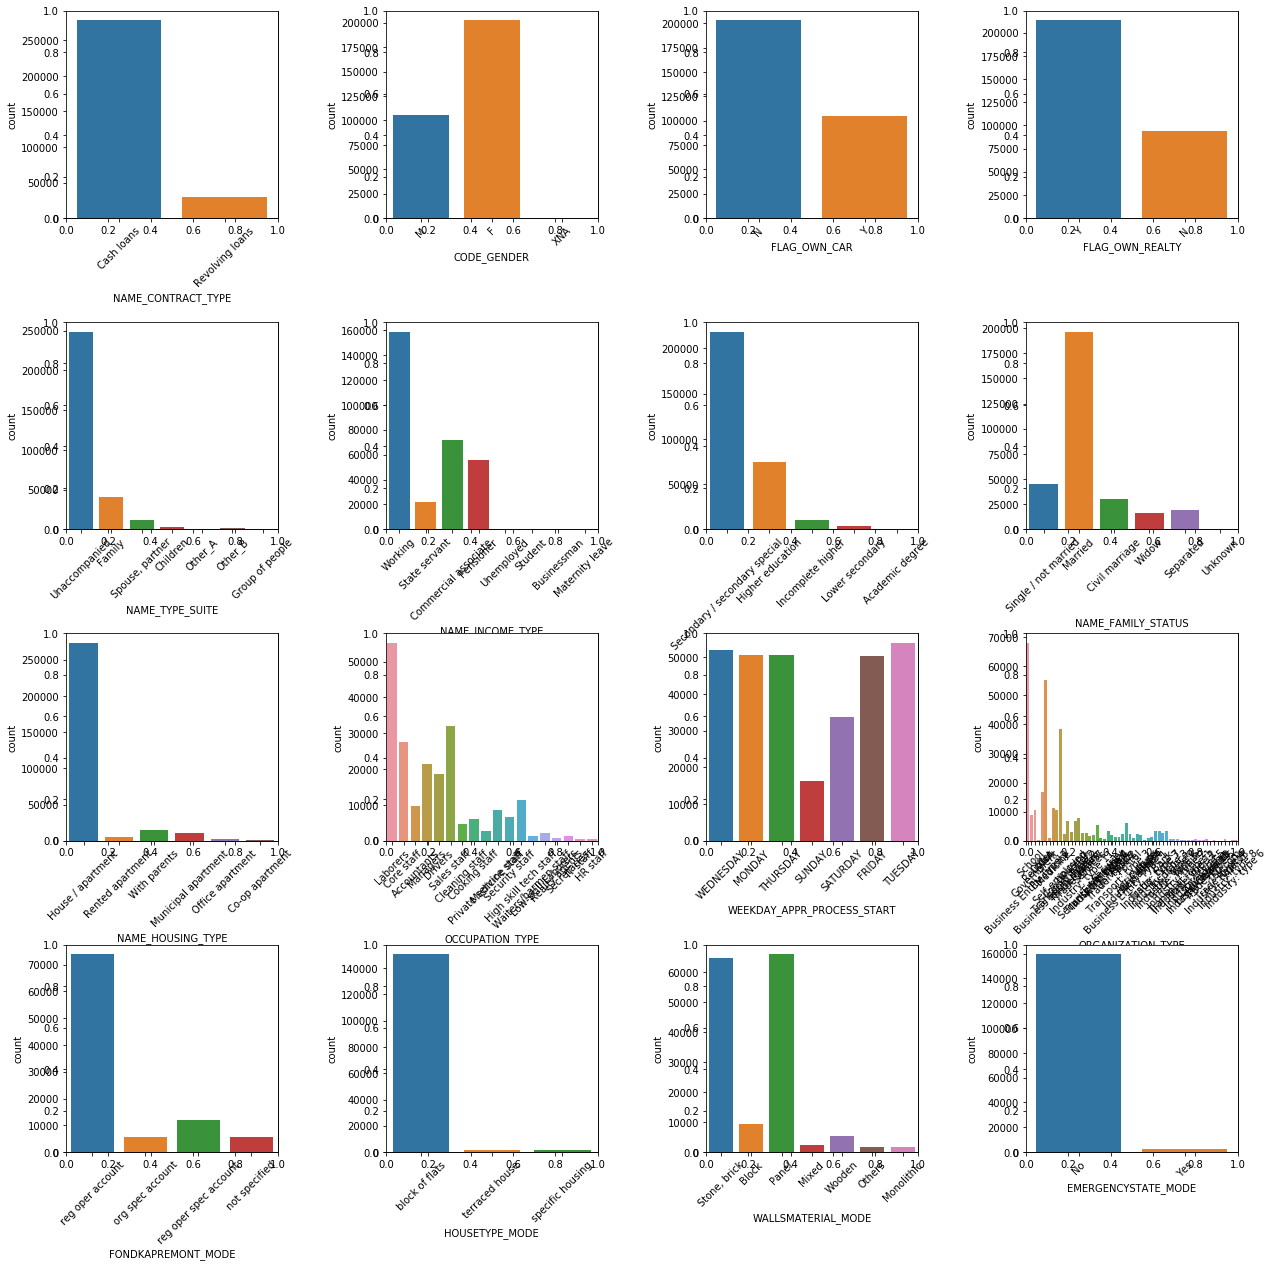

In [58]:
fig, ax = plt.subplots(4,4, figsize=(21, 21))
fig.subplots_adjust(hspace = .5, wspace=.51)
for c, v in enumerate(cat_features):
    ax = fig.add_subplot(4, 4, c+1)
    sns.countplot(x=v, data=datasets["application_train"])
    plt.xticks(rotation = 45)
    plt.xlabel(v)

### Numerical Features

In [62]:
num_features = datasets["application_train"].select_dtypes(include=['float64', 'int']).columns.tolist()
num_features

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

## Distribution of the target column 

In [60]:
datasets["application_train"]['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

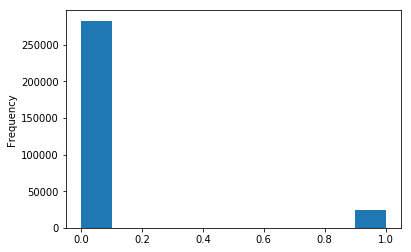

In [61]:
datasets["application_train"]['TARGET'].astype(int).plot.hist();

* If both levels of target feature are more than 10%, logistic regression classifier would be an overestimate the coefficients. Let's look at the proportions of target variable

In [9]:
print ("Percentage of target levels:")
print (np.round(datasets["application_train"]['TARGET'].value_counts()/datasets["application_train"].shape[0]*100),1)

Percentage of target levels:
0    92.0
1     8.0
Name: TARGET, dtype: float64 1


Only __8%__ of clients failed to repay on time. We have much more loans that repaid on time other than the not repaid on time. So, we have a inbalanced target distribution. 

## Correlation with  the target column 

In [11]:
correlations = datasets["application_train"].corr(method="spearman")['TARGET'].sort_values(ascending=False)
print('Most Positive Correlations:\n', correlations.head(10))
print('\nMost Negative Correlations:\n', correlations.tail(10).sort_values(ascending=True))

Most Positive Correlations:
 TARGET                         1.000000
DAYS_BIRTH                     0.078328
REGION_RATING_CLIENT_W_CITY    0.060936
REGION_RATING_CLIENT           0.058909
DAYS_LAST_PHONE_CHANGE         0.053711
OWN_CAR_AGE                    0.052932
DAYS_ID_PUBLISH                0.052535
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3      -0.166330
EXT_SOURCE_1      -0.151128
EXT_SOURCE_2      -0.147332
FLOORSMAX_AVG     -0.046178
FLOORSMAX_MEDI    -0.046019
FLOORSMAX_MODE    -0.045357
LIVINGAREA_AVG    -0.041631
LIVINGAREA_MEDI   -0.041140
TOTALAREA_MODE    -0.040071
LIVINGAREA_MODE   -0.039060
Name: TARGET, dtype: float64


From the correlations, we can see that DAYS_BIRTH which indicating the age of the client is most positively correlated with Target, and EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3 are most negtively correlated with Target. we will look more close into those columns and some more column which we think might be important factors for our model. 

Correlation Heatmap


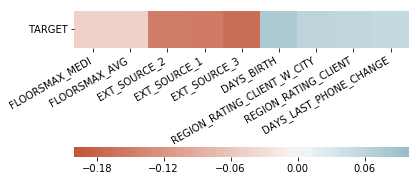

In [12]:
print ('\033[1m\033[4mCorrelation Heatmap\033[0m'.center(2))

corr_heatmap=correlations.iloc[np.r_[-5:0,0:5]]
corr=pd.DataFrame(corr_heatmap).T.drop(columns="TARGET")

grid_kws = {"height_ratios": (.95, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(corr, ax=ax,
                  cbar_ax=cbar_ax,vmin=-0.2, vmax=0.1, center=0,
                  cbar_kws={"orientation": "horizontal"},square=True,
                 cmap=sns.diverging_palette(20, 220, n=200),fmt = '')

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=30,
    horizontalalignment='right'
);

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right'
);



figure = ax.get_figure()    
figure.savefig('ax.png', dpi=900)

## Examining number of days employed of clients

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000., 400000.]), <a list of 10 Text xticklabel objects>)

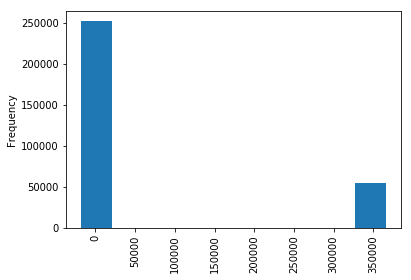

In [13]:
datasets["application_train"]['DAYS_EMPLOYED'].plot.hist();
plt.xticks(rotation='vertical')

From the above distribution, we can see that there is anomalous data present in the **DAYS_EMPLOYED** column. We need to replace these with np.nan and impute them later

## Examining statistics by Gender

In [14]:
# proportion of participants by gender
datasets["application_train"]['CODE_GENDER'].value_counts()/datasets["application_train"].shape[0]

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [15]:
dummies=pd.get_dummies(datasets["application_train"]['CODE_GENDER'])
target=datasets["application_train"]['TARGET']
merged= pd.concat([dummies,target],axis="columns").drop(columns=["M"])
merged=merged.rename(columns={"F": "Gender: 0=Male, 1=Female"})
merged.head(5)

Gender: 0=Male, 1=Female  XNA  TARGET
0                         0    0       1
1                         1    0       0
2                         0    0       0
3                         1    0       0
4                         0    0       0

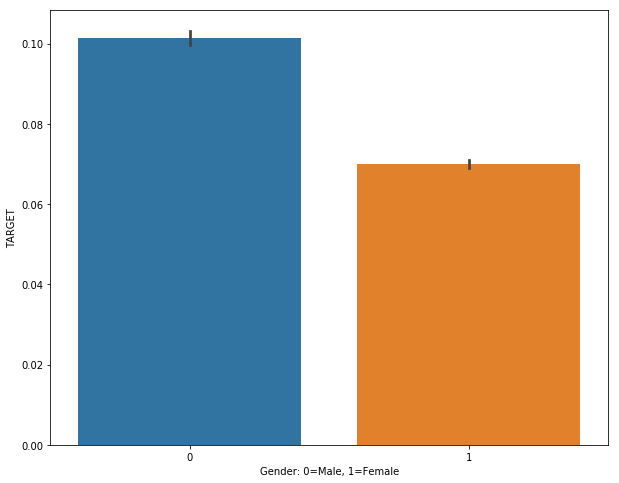

In [16]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x="Gender: 0=Male, 1=Female", y="TARGET", data=merged)

* Barplot suggests that female clients more frequently repay their loans, compared to male clients

## Examining statistics by Age of Clients 

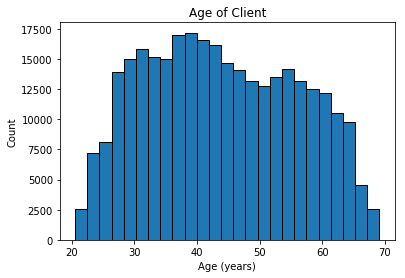

In [64]:
plt.hist(datasets["application_train"]['DAYS_BIRTH'] / -365, edgecolor = 'k', bins ="sturges")
# Plot the distribution of ages in years
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

From the histigram, we can see there are all resonable age values and no outliers. With less clients under about 25 years old and above 65 years old, we have more applicants between 25 years old to 45 years old. But we can't tell much how age will influent the target value. Let's plot the density plots to show the distribution of applicants' age with different target values.   

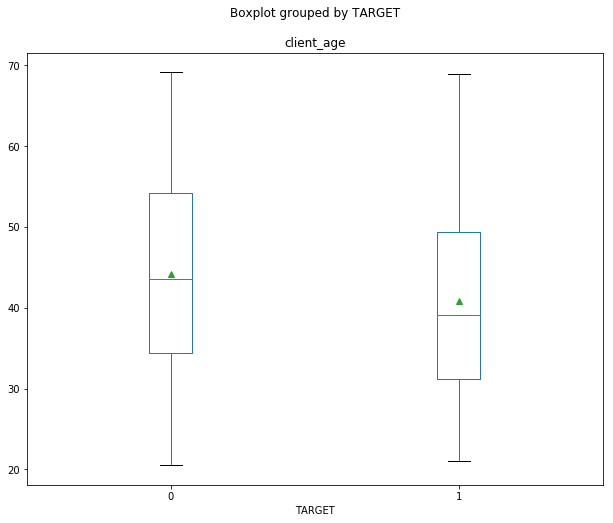

In [17]:
datasets["application_train"]["client_age"]= -datasets["application_train"][['DAYS_BIRTH']]/365
fig, ax = plt.subplots(figsize=(10,8))

datasets["application_train"].boxplot(column=['client_age'], by='TARGET', ax=ax,grid=False, 
                                      showmeans =True )


The above boxplot indicates that older clients tend to repay the loans more frequently compared to younger clients

## Density Plots for External Sources 

From the density plots, we can see older clients have better records about repaid loans. 

External scource is about "normalized score from external data source". The density plots of these external sources shows how they related with the target value. EXT_SOURCE_1 and EXT_SOURCE_3 show less score related higher failure in repaying loans. EXT_SOURCE_2 does not show obvious difference but it agrees with lower score pointing to high failure rate.

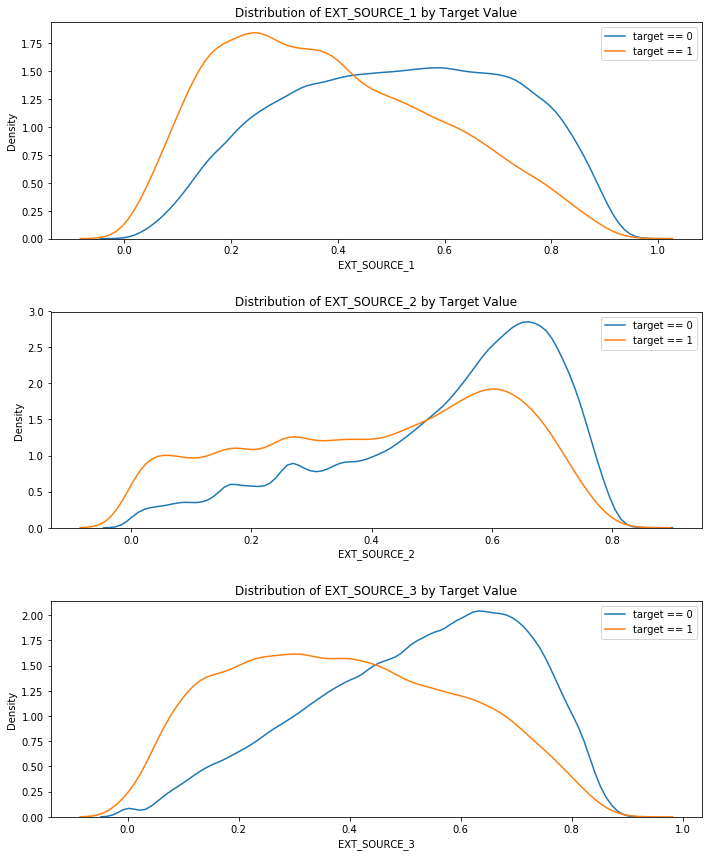

In [66]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(datasets["application_train"].loc[datasets["application_train"]['TARGET'] == 0, source].dropna(), label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(datasets["application_train"].loc[datasets["application_train"]['TARGET'] == 1, source].dropna(), label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

## Input variables Correlation Test

* Correlation between AMT_ANNUITY and AMT_CREDIT

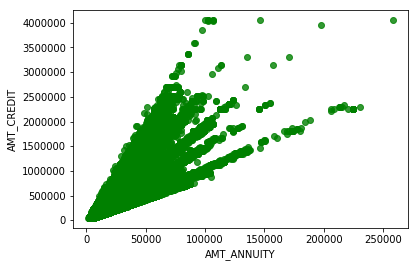

In [19]:
sns.regplot(datasets["application_train"]['AMT_ANNUITY'], datasets["application_train"]['AMT_CREDIT'], color="g", fit_reg=False)


From the above plot, the variables AMT_ANUITY and AMT_CREDIT seem to be postively correlated. One of features can be excluded from the final list of input features

## Dataset questions
* Unique record for each SK_ID_CURR

In [68]:
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

In [69]:
len(datasets["application_train"]["SK_ID_CURR"].unique()) == datasets["application_train"].shape[0]

True

In [70]:
#Return the sorted, unique values that are in both of the input arrays.
np.intersect1d(datasets["application_train"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])

array([], dtype=int64)

## EDA on secondary table processing

1. Transform all the secondary tables to features that can be joined into the main table the application table (labeled and unlabeled)
   * 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 
   * 'previous_application', 'POS_CASH_balance'
* Merge the transformed secondary tables with the primary tables (i.e., the `application_train` data (the labeled dataset) and with the `application_test` data (the unlabeled submission dataset)), thereby leading to X_train, y_train, X_valid, etc.
* Proceed with the learning pipeline using X_train, y_train, X_valid, etc.
* Generate a submission file using the learnt model


### Previous Application Dataset

The persons in the kaggle submission file have had previous applications in the `previous_application.csv`. 47,800 out 48,744 people have had previous appications.

In [71]:
Pre_appsDF = datasets["previous_application"]

In [72]:
Pre_appsDF.shape

(1670214, 37)

In [73]:
len(np.intersect1d(datasets["previous_application"]["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"]))

47800

* Missing values in prevApps

In [74]:
Pre_appsDF.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [75]:
Pre_appsDF.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [76]:
print(f"There are  {Pre_appsDF.shape[0]:,} previous applications")

There are  1,670,214 previous applications


In [77]:
# How many entries are there for each month?
prevAppCounts = Pre_appsDF['SK_ID_CURR'].value_counts(dropna=False)


In [78]:
len(prevAppCounts[prevAppCounts >40])  #more than 40 previous applications

101

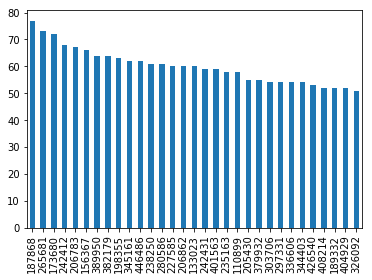

In [79]:
prevAppCounts[prevAppCounts >50].plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

#### Histogram of Number of previous applications for an ID

In [80]:
#what's this for?
sum(Pre_appsDF['SK_ID_CURR'].value_counts()==1)

60458

Text(0.5, 1.0, 'Histogram of Number of previous applications for an ID')

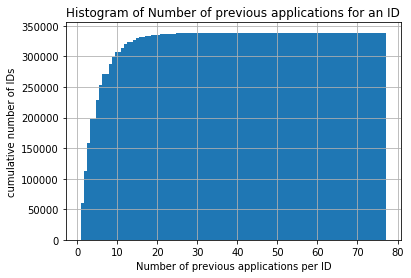

In [81]:
# Histogram of accumulated Number of previous applications
plt.hist(Pre_appsDF['SK_ID_CURR'].value_counts(), cumulative =True, bins = 100);
plt.grid()
plt.ylabel('cumulative number of IDs')
plt.xlabel('Number of previous applications per ID')
plt.title('Histogram of Number of previous applications for an ID')


#### Previous loan rejection reasons

In [82]:
Pre_appsDF['CODE_REJECT_REASON'].nunique()

9

In [83]:
Pre_appsDF['CODE_REJECT_REASON'].value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

#### Previous loans status - Count of Approved and Rejected

In [84]:
Pre_appsDF['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [86]:
Pre_apps_all = Pre_appsDF['SK_ID_CURR'].nunique()
Pre_apps_5plus = Pre_appsDF['SK_ID_CURR'].value_counts()>=5
Pre_apps_40plus = Pre_appsDF['SK_ID_CURR'].value_counts()>=40
print('Percentage with 10 or more previous apps:', np.round(100.*(sum(Pre_apps_5plus)/Pre_apps_all),5))
print('Percentage with 40 or more previous apps:', np.round(100.*(sum(Pre_apps_40plus)/Pre_apps_all),5))

Percentage with 10 or more previous apps: 41.76895
Percentage with 40 or more previous apps: 0.03453


##### **Can we differentiate applications by low, medium and high previous apps?**
    * Low = <5 claims (22%)
    * Medium = 10 to 39 claims (58%)
    * High = 40 or more claims (20%)

### Installments Payments Dataset

In [87]:
instDF = datasets['installments_payments']

In [88]:
sum(instDF['SK_ID_CURR'].value_counts()==1)

972

In [89]:
len(np.intersect1d(datasets['installments_payments']["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"]))

291643

In [90]:
instDF.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [91]:
instDF.describe()

SK_ID_PREV    SK_ID_CURR  NUM_INSTALMENT_VERSION  \
count  1.360540e+07  1.360540e+07            1.360540e+07   
mean   1.903365e+06  2.784449e+05            8.566373e-01   
std    5.362029e+05  1.027183e+05            1.035216e+00   
min    1.000001e+06  1.000010e+05            0.000000e+00   
25%    1.434191e+06  1.896390e+05            0.000000e+00   
50%    1.896520e+06  2.786850e+05            1.000000e+00   
75%    2.369094e+06  3.675300e+05            1.000000e+00   
max    2.843499e+06  4.562550e+05            1.780000e+02   

       NUM_INSTALMENT_NUMBER  DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  \
count           1.360540e+07     1.360540e+07        1.360250e+07   
mean            1.887090e+01    -1.042270e+03       -1.051114e+03   
std             2.666407e+01     8.009463e+02        8.005859e+02   
min             1.000000e+00    -2.922000e+03       -4.921000e+03   
25%             4.000000e+00    -1.654000e+03       -1.662000e+03   
50%             8.000000e+00    -8.180000e+02       -8.270000e+02   
75%             1.900000e+01    -3.610000e+02       -3.700000e+02   
max             2.770000e+02    -1.000000e+00       -1.000000e+00   

       AMT_INSTALMENT   AMT_PAYMENT  
count    1.360540e+07  1.360250e+07  
mean     1.705091e+04  1.723822e+04  
std      5.057025e+04  5.473578e+04  
min      0.000000e+00  0.000000e+00  
25%      4.226085e+03  3.398265e+03  
50%      8.884080e+03  8.125515e+03  
75%      1.671021e+04  1.610842e+04  
max      3.771488e+06  3.771488e+06

### Credit Card balance dataset

In [92]:
ccbDF = datasets['credit_card_balance']

#### Number of clients on the application training data with credit card balance data

In [93]:
len(np.intersect1d(datasets['credit_card_balance']["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"]))

86905

From the above, it can be seen that the credit card balance data is available only for 30% of the input training data. Imputing the missing values with mean may not be appropriate

In [94]:
ccbDF.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                 1700.325  ...          0.000                 0.000   
1                 2250.000  ...      64875.555             64875.555   
2                 2250.000  ...      31460.085             31460.085   
3                11795.760  ...     233048.970            233048.970   
4                22924.890  ...     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

### Bureau and Bureau Balance Datasets

In [352]:
burDF = datasets['bureau']
burbDF = datasets['bureau_balance']

In [350]:
burDF.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  Total_Credit  Total_Debt  \
0  Consumer credit                -131          NaN           NaN         NaN   
1      Credit card                 -20          NaN           NaN         NaN   
2  Consumer credit                 -16          NaN           NaN         NaN   
3      Credit card                 -16          NaN           NaN         NaN   
4  Consumer credit                 -21          NaN           NaN         NaN   

   Most_Recent_Days_Credit  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN

In [353]:
burDF.shape

(1716428, 20)

In [354]:
print(len(np.intersect1d(burDF["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"])))
print(round(len(np.intersect1d(burDF["SK_ID_CURR"], datasets["application_train"]["SK_ID_CURR"]))/len(np.unique(datasets["application_train"]["SK_ID_CURR"])),2))

263491
0.86


In [355]:
print(len(np.intersect1d(burDF["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"])))
print(round(len(np.intersect1d(burDF["SK_ID_CURR"], datasets["application_test"]["SK_ID_CURR"]))/len(np.unique(datasets["application_test"]["SK_ID_CURR"])),2))

42320
0.87


Looking through some of the high-level numbers in the Bureau dataset, more than 85% of our applicants have information on this dataset, so it's definitely worth pursuing adding this information into the model.

In [286]:
burbDF.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [287]:
np.count_nonzero(burDF['CREDIT_DAY_OVERDUE'])/len(burDF['CREDIT_DAY_OVERDUE'])

0.0024568464275809996

Bureau Balance is a level of granularity on each credit that we do not need to be concerned with. We have only .2% of our population has overdue credits, so calculating out the number of individual months overdue isn't going to be of much benefit.

So now we will take a look at our various features and their distributions.

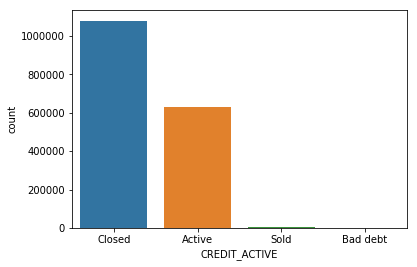

In [289]:
sns.countplot(burDF['CREDIT_ACTIVE'])

We've got a health number of obsevations in both active credit. We will be comfortable engineering features off of these subsets.

(array([ 47137.,  51695.,  56894.,  53955.,  49900.,  35938.,  40812.,
         54562.,  66378.,  80971.,  89889.,  97227., 106785., 107929.,
        118204., 127570., 134756., 147090., 144486., 104250.]),
 array([-2922. , -2775.9, -2629.8, -2483.7, -2337.6, -2191.5, -2045.4,
        -1899.3, -1753.2, -1607.1, -1461. , -1314.9, -1168.8, -1022.7,
         -876.6,  -730.5,  -584.4,  -438.3,  -292.2,  -146.1,     0. ]),
 <a list of 20 Patch objects>)

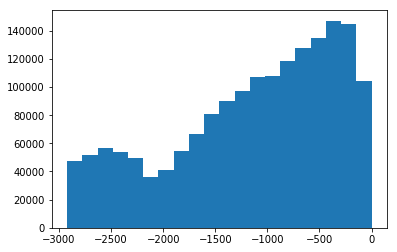

In [290]:
plt.hist(burDF['DAYS_CREDIT'],bins = 20)

# Feature Engineering

## Engineering Features: Primary table - application_train

**Deriving new features from the training data:**
 
* ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
* CREDIT_TERM: the length of the payment in years
* DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age (after imputing anomalous values in 'DAYS_EMPLOYED')
* GOODS_PRICE_CREDIT_PERCENT: the percentage of the goods price relative to the loan credit amount
* INCOME_PER_FAM_MEMBERS: the income per family members
* TOTAL_ENQ_BUREAU: total number of enquiries to Credit Bureau 


In [42]:
class app_add_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X=pd.DataFrame(X, columns=self.features)
        X['ANNUITY_INCOME_PERCENT'] = X['AMT_ANNUITY'] / X['AMT_INCOME_TOTAL']
        X['CREDIT_TERM'] = X['AMT_CREDIT'] / X['AMT_ANNUITY']
        X['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
        X['AGE'] = X['DAYS_BIRTH'] / -365
        X['DAYS_EMPLOYED_PERCENT'] = X['DAYS_EMPLOYED'] / X['DAYS_BIRTH']
        X['GOODS_PRICE_CREDIT_PERCENT']=X['AMT_CREDIT'] / X['AMT_GOODS_PRICE']
        X['INCOME_PER_FAM_MEMBERS']=X['AMT_INCOME_TOTAL'] / X['CNT_FAM_MEMBERS']
        X['TOTAL_ENQ_BUREAU']=X['AMT_REQ_CREDIT_BUREAU_DAY']\
        +X['AMT_REQ_CREDIT_BUREAU_WEEK']\
        + X['AMT_REQ_CREDIT_BUREAU_MON']\
        + X['AMT_REQ_CREDIT_BUREAU_QRT']\
        + X['AMT_REQ_CREDIT_BUREAU_YEAR']
        X=X.replace([np.inf, -np.inf], np.nan)
        return X

In [ ]:
'DAYS_BIRTH','DAYS_EMPLOYED','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'

In [ ]:
'AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH','AMT_CREDIT','AMT_GOODS_PRICE','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'

## Engineering Features: previous_application

**New features**
* Count of previous approved applications based on NAME_CONTRACT_STATUS
* Count of previous refused applications based on NAME_CONTRACT_STATUS
* Difference between applied and approved credit amount.
* Aggregate stats for 'AMT_ANNUITY'
* Aggregate stats for 'AMT_APPLICATION'
* Prev_GOODS_PRICE_CREDIT_PERCENT: the percentage of the goods price relative to the loan credit amount
* Prev_CREDIT_APP_PERCENTAGE: the percentage of the credit was granted relative to the loan was applied
* Group by the client id, calculate aggregation statistics

In [43]:
class prev_apps_add_features1(BaseEstimator, TransformerMixin):
    def __init__(self, feature=None): # no *args or **kargs
        self.feature = feature # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X=pd.DataFrame(X)
        X['Pre_GOODS_PRICE_CREDIT_PERCENT']=X['AMT_CREDIT'] / X['AMT_GOODS_PRICE']
        X['Pre_CREDIT_APP_PERCENTAGE']=X['AMT_CREDIT'] / X['AMT_APPLICATION']
        X=X.replace([np.inf, -np.inf], np.nan)
    
        return X

In [44]:
class prev_apps_add_features2(BaseEstimator, TransformerMixin):
    def __init__(self, feature='text'): # no *args or **kargs
        self.feature = feature # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['Prev_appr_count'] = X['NAME_CONTRACT_STATUS'].map(lambda x: 1 if (x == 'Approved') else 0)
        X['Prev_rej_count'] = X['NAME_CONTRACT_STATUS'].map(lambda x: 1 if (x == 'Refused') else 0)
        X['Diff_credit_appr'] = X['AMT_APPLICATION'] - X['AMT_CREDIT'] 
        return X

In [45]:
# Create aggregate features (via pipeline)
class prevAppsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            if f not in (features[-1], features[-2]):
                self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            else:
                self.agg_op_features[f] = {f"{f}_{func}":func for func in ["sum"]}

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        result['range_AMT_APPLICATION'] = result['AMT_APPLICATION_max'] - result['AMT_APPLICATION_min']
        return result # return dataframe with the join key "SK_ID_CURR"
    

In [ ]:
'Pre_GOODS_PRICE_CREDIT_PERCENT', 'Pre_CREDIT_APP_PERCENTAGE','Prev_appr_count','Prev_rej_count','Diff_credit_appr'

## Engineering Features: Installment Payments

* Difference in AMT_INSTALMENT and AMT_PAYMENT
* Difference in DAYS_ENTRY_PAYMENT and DAYS_INSTALMENT

In [46]:
class instpmts_add_features1(BaseEstimator, TransformerMixin):
    def __init__(self, feature=None): # no *args or **kargs
        self.feature = feature # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X['Diff_amt_paid'] = X['AMT_INSTALMENT'] - X['AMT_PAYMENT'] 
        X['Diff_pmt_days'] = X['DAYS_ENTRY_PAYMENT'] - X['DAYS_INSTALMENT'] 
        return X

In [47]:
# Create aggregate features (via pipeline)
class instpmntsFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = {f"{f}_{func}":func for func in ["min", "max", "mean"]}
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        return result # return dataframe with the join key "SK_ID_CURR"

## Engineering Features: Credit Card Balance

* Credit Utilisation - AMT_BALANCE / AMT_CREDIT_LIMIT_ACTUAL
* Total number of Days past Due - SK_DPD_DEF

In [48]:
class crdcardbal_add_features1(BaseEstimator, TransformerMixin):
    def __init__(self, feature='text'): # no *args or **kargs
        self.feature = feature # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #X['Diff_amt_paid'] = X['AMT_INSTALMENT'] - X['AMT_PAYMENT'] 
        #X['Diff_pmt_days'] = X['DAYS_ENTRY_PAYMENT'] - X['DAYS_INSTALMENT'] 
        return X

In [49]:
# Create aggregate features (via pipeline)
class crdcardbalFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = {f"{f}_{func}":func for func in ["sum"]}
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit         
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        result['Perc_Credit_util'] = np.round(result['AMT_BALANCE_sum'] / result['AMT_CREDIT_LIMIT_ACTUAL_sum'],3)
        result.drop(['AMT_BALANCE_sum', 'AMT_CREDIT_LIMIT_ACTUAL_sum'], axis=1, inplace=True)
        result=result.replace([np.inf, -np.inf], np.nan)
        result['SK_DPD_DEF_sum'].fillna(0, inplace=True)
        result['Perc_Credit_util'].fillna(0, inplace=True)
        return result # return dataframe with the join key "SK_ID_CURR"
    
    
#from sklearn.pipeline import make_pipeline 
#def test_driver_crecardbalFeaturesAggregater(df, features):
   # print(f"df.shape: {df.shape}\n")
   # print(f"df[{features}][0:5]: \n{df[features][0:5]}")
   # test_pipeline = make_pipeline(crdcardbalFeaturesAggregater(features))
   # return(test_pipeline.fit_transform(df))
         
#card_features = ['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'SK_DPD_DEF']
#res = test_driver_crecardbalFeaturesAggregater(ccbDF, card_features)
#print(f"HELLO")
#print(f"Test driver: \n{res[0:10]}")
#print(f"input[features][0:10]: \n{Pre_appsDF[0:10]}")


## Engineering Features: Bureau and Bureau Balance
We will engineer a few features. First, we'll get the total active credit and total debt for each consumer.  Then we will determine the most recent credit activity for each consumer.

In [50]:
class bur_add_features(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features # no *args or **kargs
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X,y=None):
        X['Total_Credit'] = X[X['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum()
        X['Total_Debt'] = X.groupby('SK_ID_CURR')['AMT_CREDIT_SUM_DEBT'].sum()
        X['Most_Recent_Days_Credit'] = X[X['CREDIT_ACTIVE'] == 'Active'].groupby('SK_ID_CURR')['DAYS_CREDIT'].max()
        X['Total_Credit'].fillna(0, inplace=True)
        X['Total_Debt'].fillna(0, inplace=True)
        X['Most_Recent_Days_Credit'].fillna(0, inplace=True)
        return X

In [ ]:
'Total_Credit','Total_Debt','Most_Recent_Days_Credit'

In [51]:
class bureauFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
    
        self.features = features
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = {f"{f}_{func}":func for func in ["mean"]}
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        return result # return dataframe with the join key "SK_ID_CURR"
        
    

## Engineering Features: POS_CASH_balance

* Park it for Next round of EDA and Feature engineering

In [52]:
class pcbFeaturesAggregater(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
        self.agg_op_features = {}
        for f in features:
            self.agg_op_features[f] = {f"{f}_{func}":func for func in ["sum"]}
            
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        result = X.groupby(["SK_ID_CURR"]).agg(self.agg_op_features)
        if len(result.columns.levels)>1:
            result.columns = result.columns.droplevel()
        result = result.reset_index(level=["SK_ID_CURR"])
        return result # return dataframe with the join key "SK_ID_CURR"
        
    

# Feature Engineering Pipeline

## Build Feature Engineering Pipelines

In [53]:
# Feature Engineering Pipeline for 'application_train'

Apps_feature_pipeline = Pipeline([('app_add_features', app_add_features()),])

In [54]:
# Feature Engineering Pipeline for 'previous_application'

prev_features = ['AMT_ANNUITY', 'AMT_APPLICATION', 'Diff_credit_appr', 'Pre_GOODS_PRICE_CREDIT_PERCENT', 'Pre_CREDIT_APP_PERCENTAGE', 'Prev_appr_count', 'Prev_rej_count']
prevApps_feature_pipeline = Pipeline([
        ('prev_apps_add_features1', prev_apps_add_features1()),
        ('prev_apps_add_features2', prev_apps_add_features2()),
        ('prevAppsFeaturesAggregater', prevAppsFeaturesAggregater(prev_features))
    ])

In [55]:
# Feature Engineering Pipeline for 'installments_payments'

inst_features = ['Diff_amt_paid', 'Diff_pmt_days']

instpmts_feature_pipeline = Pipeline([
        ('instpmt_add_features1', instpmts_add_features1()),  # add some new features 
        ('instpmt_aggregater', instpmntsFeaturesAggregater(inst_features)), # Aggregate across old and new features
    ])

In [56]:
# Feature Engineering Pipeline for 'credit_card_balance'

card_features = ['AMT_BALANCE', 'AMT_CREDIT_LIMIT_ACTUAL', 'SK_DPD_DEF']
crdbal_feature_pipeline = Pipeline([
        ('crdcardbal_add_features1', crdcardbal_add_features1()),  # add some new features 
        ('crdbal_aggregater', crdcardbalFeaturesAggregater(card_features)), # Aggregate across old and new features
    ])

In [57]:
# Feature Engineering Pipeline for 'bureau'

bureau_features = ['Total_Credit','Total_Debt','Most_Recent_Days_Credit']
bu_feature_pipeline = Pipeline([('bur_add_features',bur_add_features()),
                                ('bureauFeaturesAggregater',bureauFeaturesAggregater(bureau_features)),
       ])

In [58]:
# Feature Engineering Pipeline for 'POS_CASH_balance'

#POS_CASH_balance_features = ['SK_ID_CURR']
#pcb_feature_pipeline = Pipeline([('pcbFeaturesAggregater',pcbFeaturesAggregater(POS_CASH_balance_features))
   #    ])

## Prepare the labeled dataset

### Select a subset of input features for baseline. Include the features most correlated with target

In [259]:
# transform datasets through feature engineering pipelines
selected_features = ['SK_ID_CURR','AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'AMT_CREDIT','DAYS_EMPLOYED','EXT_SOURCE_1',
        'EXT_SOURCE_2','EXT_SOURCE_3','CODE_GENDER', 'FLAG_OWN_REALTY','FLAG_OWN_CAR','NAME_CONTRACT_TYPE', 
                   'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','NAME_INCOME_TYPE','AMT_ANNUITY','AMT_GOODS_PRICE',
'CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR', 
                    'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT', 'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH',
                   'REG_CITY_NOT_WORK_CITY', 'FLAG_EMP_PHONE', 'REG_CITY_NOT_LIVE_CITY', 'FLAG_DOCUMENT_3']

apps_train= datasets["application_train"][selected_features]#primary dataset
y=datasets["application_train"]["TARGET"]
Pre_appsDF = datasets["previous_application"] #prev app
instDF = datasets["installments_payments"]
ccbDF = datasets['credit_card_balance']
burDF = datasets['bureau']
burbDF = datasets['bureau_balance']
bur_burbDF=burDF.merge(burbDF,how='left', on='SK_ID_BUREAU')
pcbDF = datasets['POS_CASH_balance']

In [9]:
y=datasets["application_train"]["TARGET"]

In [261]:
def prepare_datasets(X):
    
        
        X=Apps_feature_pipeline.transform(X)
        print("Xapp: ", X.shape)
        X=X.merge(prevApps_feature_pipeline.transform(Pre_appsDF), how='left', on='SK_ID_CURR')
        print("Xprevapp: ", X.shape)
        X=X.merge(instpmts_feature_pipeline.transform(instDF),how='left', on='SK_ID_CURR')
        print("Xinst: ", X.shape)
        X=X.merge(crdbal_feature_pipeline.transform(ccbDF),how='left', on='SK_ID_CURR')
        print("Xcrd: ", X.shape)
        X=X.merge(bu_feature_pipeline.transform(bur_burbDF),how='left', on='SK_ID_CURR')
        print("Xbu: ", X.shape)
        #X=X.merge(pcb_feature_pipeline.transform(pcbDF),how='left', on='SK_ID_CURR')
        X=X.drop(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis=1)
        print("Xfinal: ", X.shape)
        return X



In [10]:
if os.path.exists("X.pkl"):
    X = pd.read_pickle("X.pkl")
else:
    X= prepare_datasets(apps_train)
    X.to_pickle("X.pkl")    
X.head()

SK_ID_CURR  AMT_INCOME_TOTAL  AMT_CREDIT  EXT_SOURCE_1  EXT_SOURCE_2  \
0      100002          202500.0    406597.5      0.083037      0.262949   
1      100003          270000.0   1293502.5      0.311267      0.622246   
2      100004           67500.0    135000.0           NaN      0.555912   
3      100006          135000.0    312682.5           NaN      0.650442   
4      100007          121500.0    513000.0           NaN      0.322738   

   EXT_SOURCE_3 CODE_GENDER FLAG_OWN_REALTY FLAG_OWN_CAR NAME_CONTRACT_TYPE  \
0      0.139376           M               Y            N         Cash loans   
1           NaN           F               N            N         Cash loans   
2      0.729567           M               Y            Y    Revolving loans   
3           NaN           F               Y            N         Cash loans   
4           NaN           M               Y            N         Cash loans   

   ... Diff_amt_paid_max Diff_amt_paid_mean Diff_pmt_days_min  \
0  ...             0.000           0.000000             -31.0   
1  ...             0.000           0.000000             -14.0   
2  ...             0.000           0.000000             -11.0   
3  ...             0.000           0.000000             -77.0   
4  ...         22655.655         452.384318             -31.0   

   Diff_pmt_days_max  Diff_pmt_days_mean  SK_DPD_DEF_sum  Perc_Credit_util  \
0              -12.0          -20.421053             NaN               NaN   
1               -1.0           -7.160000             NaN               NaN   
2               -3.0           -7.666667             NaN               NaN   
3               -1.0          -19.375000             0.0               0.0   
4               12.0           -3.636364             NaN               NaN   

   Total_Credit_mean  Total_Debt_mean  Most_Recent_Days_Credit_mean  
0                0.0              0.0                           0.0  
1                0.0              0.0                           0.0  
2                0.0              0.0                           0.0  
3                NaN              NaN                           NaN  
4                0.0              0.0                           0.0  

[5 rows x 60 columns]

In [9]:
if os.path.exists("y.pkl"):
    y = pd.read_pickle("y.pkl")
else:
    y= datasets["application_train"]["TARGET"]
    y.to_pickle("y.pkl")    

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)


In [54]:
X_train['']

SK_ID_CURR  AMT_INCOME_TOTAL  DAYS_BIRTH  AMT_CREDIT  DAYS_EMPLOYED  \
21614       125178          180000.0      -12717   1305000.0         -877.0   
209797      343134           81000.0      -12307    450000.0        -1298.0   
17976       120964           90000.0      -22406    127350.0            NaN   
282543      427277          135000.0       -8516    460858.5         -231.0   
52206       160455          225000.0      -15259    611905.5            NaN   

        EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3 CODE_GENDER FLAG_OWN_REALTY  \
21614       0.506595      0.039170      0.415347           F               Y   
209797           NaN      0.198386           NaN           F               N   
17976            NaN      0.589705      0.735221           F               Y   
282543           NaN      0.000954      0.065550           M               Y   
52206            NaN      0.263144      0.160489           M               N   

        ... Diff_amt_paid_max Diff_amt_paid_mean Diff_pmt_days_min  \
21614   ...             0.000             0.0000             -11.0   
209797  ...             0.000             0.0000             -20.0   
17976   ...         20228.265          1326.8145             -39.0   
282543  ...             0.000             0.0000             -42.0   
52206   ...             0.000             0.0000              -9.0   

       Diff_pmt_days_max Diff_pmt_days_mean  SK_DPD_DEF_sum  Perc_Credit_util  \
21614              -10.0         -10.750000             NaN               NaN   
209797             -10.0         -15.583333             NaN               NaN   
17976               55.0          -5.000000             0.0              0.26   
282543              -4.0         -34.090909             NaN               NaN   
52206                0.0          -4.250000             NaN               NaN   

        Total_Credit_mean  Total_Debt_mean  Most_Recent_Days_Credit_mean  
21614                 0.0              0.0                           0.0  
209797                NaN              NaN                           NaN  
17976                 0.0              0.0                           0.0  
282543                0.0              0.0                           0.0  
52206                 0.0              0.0                           0.0  

[5 rows x 67 columns]

## Prepare the unlabeled dataset (i.e., the Kaggle test dataset)

In [58]:
# with all features, shall we do the same thing as application_train?

X_kaggle_test= datasets["application_test"][selected_features]

prepared_kaggle_test= prepare_datasets(X_kaggle_test)

prepared_kaggle_test.head()

Xapp:  (48744, 38)
Xprevapp:  (48744, 56)
Xinst:  (48744, 62)
Xcrd:  (48744, 64)
Xbu:  (48744, 67)
Xfinal:  (48744, 60)


SK_ID_CURR  AMT_INCOME_TOTAL  AMT_CREDIT  EXT_SOURCE_1  EXT_SOURCE_2  \
0      100001          135000.0    568800.0      0.752614      0.789654   
1      100005           99000.0    222768.0      0.564990      0.291656   
2      100013          202500.0    663264.0           NaN      0.699787   
3      100028          315000.0   1575000.0      0.525734      0.509677   
4      100038          180000.0    625500.0      0.202145      0.425687   

   EXT_SOURCE_3 CODE_GENDER FLAG_OWN_REALTY FLAG_OWN_CAR NAME_CONTRACT_TYPE  \
0      0.159520           F               Y            N         Cash loans   
1      0.432962           M               Y            N         Cash loans   
2      0.610991           M               Y            Y         Cash loans   
3      0.612704           F               Y            N         Cash loans   
4           NaN           M               N            Y         Cash loans   

   ... Diff_amt_paid_max Diff_amt_paid_mean Diff_pmt_days_min  \
0  ...              0.00           0.000000             -36.0   
1  ...              0.00           0.000000             -37.0   
2  ...          23147.82        1157.662742             -38.0   
3  ...           8505.00         622.550708             -19.0   
4  ...              0.00           0.000000             -18.0   

   Diff_pmt_days_max  Diff_pmt_days_mean  SK_DPD_DEF_sum  Perc_Credit_util  \
0               11.0           -7.285714             NaN               NaN   
1                1.0          -23.555556             NaN               NaN   
2               21.0           -5.180645             1.0             0.138   
3                7.0           -3.000000             0.0             0.036   
4               -9.0          -12.250000             NaN               NaN   

   Total_Credit_mean  Total_Debt_mean  Most_Recent_Days_Credit_mean  
0                0.0              0.0                           0.0  
1                0.0              0.0                           0.0  
2                0.0              0.0                           0.0  
3                0.0              0.0                           0.0  
4                NaN              NaN                           NaN  

[5 rows x 60 columns]

# Processing pipeline

In [16]:
num_features = X_train.select_dtypes(exclude=['object']).columns.tolist()


In [17]:
len(num_features)

53

In [18]:
cat_features = X_train.select_dtypes('object').columns.tolist()
cat_features

['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE']

In [19]:
len(cat_features)

7

In [20]:
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [21]:
# Identify the numeric features we wish to consider. 
num_attribs = num_features

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy='mean')),
        ('std_scaler', StandardScaler()),
    ])

# Identify the categorical features we wish to consider.
cat_attribs = cat_features

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

data_prep_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])
              



# Baseline Model

To get a baseline, we will use some of the features after being preprocessed through the pipeline.
The baseline model is a logistic regression model

In [74]:
def pct(x):
    return round(100*x,3)

In [31]:
try:
    expLog
except NameError:
    expLog = pd.DataFrame(columns=["exp_name", 
                                   "Train Acc", 
                                   "Valid Acc",
                                   "Test  Acc",
                                   "Train AUC", 
                                   "Valid AUC",
                                   "Test  AUC"
                                  ])


In [67]:
%%time 
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_prep_pipeline),
        ("logistic", LogisticRegression())
    ])

CPU times: user 99 µs, sys: 48 µs, total: 147 µs
Wall time: 157 µs


In [68]:
model = full_pipeline_with_predictor.fit(X_train, y_train)

In [69]:
from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train, model.predict(X_train)), 3)

0.92

## Evaluation metrics
Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

The SkLearn `roc_auc_score` function computes the area under the receiver operating characteristic (ROC) curve, which is also denoted by AUC or AUROC. By computing the area under the roc curve, the curve information is summarized in one number. 

```python
from sklearn.metrics import roc_auc_score
>>> y_true = np.array([0, 0, 1, 1])
>>> y_scores = np.array([0.1, 0.4, 0.35, 0.8])
>>> roc_auc_score(y_true, y_scores)
0.75
```

In [70]:
from sklearn.metrics import roc_auc_score


In [71]:
exp_name = f"Baseline_60_features"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, model.predict(X_train)), 
                accuracy_score(y_valid, model.predict(X_valid)),
                accuracy_score(y_test, model.predict(X_test)),
                roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  Baseline_60_features     0.9197     0.9197     0.9159     0.7569   

   Valid AUC  Test  AUC  
0      0.756     0.7587

## Hyperparameter Tuning

In [118]:
from sklearn.model_selection import GridSearchCV

param_grid = {'logistic__penalty':['l1','l2'], 
              'logistic__tol': (0.0001, 0.00001), 
              'logistic__C': [0.1, 1, 10]
             }

gs = GridSearchCV(full_pipeline_with_predictor, param_grid, cv=5,n_jobs=48) 

In [119]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preparation',
                                        FeatureUnion(n_jobs=None,
                                                     transformer_list=[('num_pipeline',
                                                                        Pipeline(memory=None,
                                                                                 steps=[('selector',
                                                                                         DataFrameSelector(attribute_names=['SK_ID_CURR',
                                                                                                                            'AMT_INCOME_TOTAL',
                                                                                                                            'AMT_CREDIT',
                                                                               

In [120]:
gs.best_params_

{'logistic__C': 0.1, 'logistic__penalty': 'l1', 'logistic__tol': 0.0001}

In [121]:
from sklearn.metrics import roc_auc_score
exp_name = f"60_features_{gs.best_params_}"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, gs.predict(X_train)), 
                accuracy_score(y_valid, gs.predict(X_valid)),
                accuracy_score(y_test, gs.predict(X_test)),
                roc_auc_score(y_train, gs.predict_proba(X_train)[:, 1]),
                roc_auc_score(y_valid, gs.predict_proba(X_valid)[:, 1]),
                roc_auc_score(y_test, gs.predict_proba(X_test)[:, 1])],
    4)) 
expLog

exp_name  Train Acc  Valid Acc  \
0                               Baseline_60_features     0.9197     0.9197   
1  60_features_{'logistic__C': 0.1, 'logistic__pe...     0.9197     0.9197   

   Test  Acc  Train AUC  Valid AUC  Test  AUC  
0     0.9159     0.7569      0.756     0.7587  
1     0.9158     0.7567      0.756     0.7588

## Feature Selection

In [25]:
num_features = X.select_dtypes(exclude=['object']).columns.tolist()
len(num_features)

53

In [26]:
num_features[1:]

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_ID_PUBLISH',
 'REG_CITY_NOT_WORK_CITY',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_3',
 'ANNUITY_INCOME_PERCENT',
 'CREDIT_TERM',
 'AGE',
 'DAYS_EMPLOYED_PERCENT',
 'GOODS_PRICE_CREDIT_PERCENT',
 'INCOME_PER_FAM_MEMBERS',
 'TOTAL_ENQ_BUREAU',
 'AMT_ANNUITY_min',
 'AMT_ANNUITY_max',
 'AMT_ANNUITY_mean',
 'AMT_APPLICATION_min',
 'AMT_APPLICATION_max',
 'AMT_APPLICATION_mean',
 'Diff_credit_appr_min',
 'Diff_credit_appr_max',
 'Diff_credit_appr_mean',
 'Pre_GOODS_PRICE_CREDIT_PERCENT_min',
 'Pre_GOODS_PRICE_CREDIT_PERCENT_max',
 'Pre_GOODS_PRICE_CREDIT_PERCENT_mean',
 'Pre_CREDIT_APP_PERCENTAGE_min',
 'Pre_CREDIT_APP_PERCENTAGE_max',
 'Pre_CREDIT_APP_PERCENTAGE_mean',
 'Prev_appr_count_sum',
 'Prev_rej_count_sum',
 'range_AMT_APPLICATION',


In [27]:
cat_features = X.select_dtypes('object').columns.tolist()
len(cat_features)

7

In [28]:
cat_features

['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE']

In [29]:
X_prep=X.copy()

In [30]:
# split from X_prep_train into X_prep_train and X_prep_valid
X_prep_train, X_prep_valid, y_prep_train, y_prep_valid = train_test_split(X_prep, y, test_size=0.15,random_state=42)


In [31]:
num_imputer=SimpleImputer(strategy='mean')
num_scaler=StandardScaler()

X_prep_train[num_features[1:]] = num_imputer.fit_transform(X_prep_train[num_features[1:]])
X_prep_train[num_features[1:]]= num_scaler.fit_transform(X_prep_train[num_features[1:]])

X_prep_valid[num_features[1:]] = num_imputer.transform(X_prep_valid[num_features[1:]])
X_prep_valid[num_features[1:]]= num_scaler.transform(X_prep_valid[num_features[1:]])

#X_prep_test[num_features[1:]] = num_imputer.transform(X_prep_test[num_features[1:]])
#X_prep_test[num_features[1:]]= num_scaler.transform(X_prep_test[num_features[1:]])

In [32]:
X_prep_train= pd.get_dummies(X_prep_train, drop_first=True)
X_prep_valid= pd.get_dummies(X_prep_valid, drop_first=True)
#X_prep_test= pd.get_dummies(X_prep_test, drop_first=True)

In [33]:
# split from X_prep_train into X_prep_train and X_prep_test
X_prep_train, X_prep_test, y_prep_train, y_prep_test = train_test_split(X_prep_train, y_prep_train, test_size=0.15, random_state=42)

In [133]:
#get onehotencoder column names
#X_prep_train[cat_features]=cat_imputer.fit_transform(X_prep_train[cat_features])
#cat_OHE.fit_transform(X_prep_train[cat_features])
#cat_OHE_column_names=cat_OHE.get_feature_names(['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'OCCUPATION_TYPE',
 'NAME_INCOME_TYPE'])

In [96]:
#cat_imputer=SimpleImputer(strategy='most_frequent')
#cat_OHE=OneHotEncoder(sparse=False, handle_unknown="ignore")

#X_prep_train[cat_features]=cat_imputer.fit_transform(X_prep_train[cat_features])
#X_prep_train=pd.concat([X_prep_train[num_features], pd.DataFrame(cat_OHE.fit_transform(X_prep_train[cat_features]), columns=cat_OHE_column_names)],axis=1, sort=False)

#X_prep_valid[cat_features] = cat_imputer.transform(X_prep_valid[cat_features])
#X_prep_valid=pd.concat([X_prep_valid[num_features],pd.DataFrame(cat_OHE.transform(X_prep_valid[cat_features]), columns=cat_OHE_column_names)],axis=1, sort=False)

#X_prep_test[cat_features] = cat_imputer.transform(X_prep_test[cat_features])
#X_prep_test=pd.concat([X_prep_test[num_features],pd.DataFrame(cat_OHE.transform(X_prep_test[cat_features]), columns=cat_OHE_column_names)],axis=1, sort=False)

In [ ]:
#cat_imputer=SimpleImputer(strategy='most_frequent')
#cat_OHE=OneHotEncoder(sparse=False, handle_unknown="ignore")

#X_prep_train[cat_features]=cat_imputer.fit_transform(X_prep_train[cat_features])


#pd.concat([(pd.DataFrame(cat_OHE.fit_transform(X_prep_train[cat_features]), columns=cat_OHE_column_names)),X_prep_train[num_features]],axis=1, sort=False,ignore_index=True).head()


In [34]:
print(X_prep_train.shape)
print(X_prep_valid.shape)
print(X_prep_test.shape)

(222176, 86)
(46127, 86)
(39208, 86)


In [35]:
feature_names = X_prep_train.columns.tolist()

### Random Forest and Feature importance

In [3]:
if os.path.exists("fi.pkl"):
    fi = pd.read_pickle("fi.pkl")


In [91]:
rfc=RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)

rfc.fit(X_prep_train, y_prep_train)



fi=pd.DataFrame(zip(feature_names, rfc.feature_importances_))

fi.columns=['feature', 'importance']
fi.to_pickle("fi.pkl")    
fi.head()

feature  importance
0        SK_ID_CURR    0.000000
1  AMT_INCOME_TOTAL    0.000035
2        AMT_CREDIT    0.003081
3      EXT_SOURCE_1    0.070195
4      EXT_SOURCE_2    0.249583

In [33]:
exp_name = f"feature_86_RandomForest"
expLog.loc[len(expLog)] = [f"{exp_name}"] + list(np.round(
               [accuracy_score(y_train, rfc.predict(X_prep_train)), 
                accuracy_score(y_valid, rfc.predict(X_prep_valid)),
                accuracy_score(y_test, rfc.predict(X_prep_test)),
                roc_auc_score(y_train, rfc.predict_proba(X_prep_train)[:, 1]),
                roc_auc_score(y_valid,rfc.predict_proba(X_prep_valid)[:, 1]),
                roc_auc_score(y_test, rfc.predict_proba(X_prep_test)[:, 1])],4)) 
expLog

exp_name  Train Acc  Valid Acc  Test  Acc  Train AUC  \
0  feature_86_RandomForest     0.9198     0.9194      0.916     0.7478   

   Valid AUC  Test  AUC  
0     0.7458     0.7428

In [4]:
def plot_feature_importances(df):
   
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

  
    fig = go.Figure(go.Bar(
           y=list(reversed(list(df['feature'][:30]))),
            x=list(reversed(list(df['importance_normalized'].head(30)))),
            orientation='h'))
    fig.update_layout(
    autosize=False,
    width=800,
    height=1000,
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    )
)

    fig.show()
    return df

In [5]:
#plot the top 30 important feature
fi_sorted = plot_feature_importances(fi)


# data preparation, feature selection and classifier pipeline

In [37]:
#load data_prep_pipeline prepared datasets
k=30
if os.path.exists(f"X_pip_prep_train_{k}.pkl"):
    X_pip_prep_train=pd.read_pickle(f"X_pip_prep_train_{k}.pkl")
if os.path.exists(f"X_pip_prep_valid_{k}.pkl"):
    X_pip_prep_valid=pd.read_pickle(f"X_pip_prep_valid_{k}.pkl")
if os.path.exists(f"X_pip_prep_test_{k}.pkl"):
    X_pip_prep_test=pd.read_pickle(f"X_pip_prep_test_{k}.pkl")

In [22]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:,self.feature_indices_]

In [92]:
#data preparation and feature selection pipeline
feature_importances=rfc.feature_importances_
k=30
prepare_select_pipeline = Pipeline([
    ("data_prep_pipeline",data_prep_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [78]:
# prepare data with prepare_select_pipeline:

X_pip_prep_train=pd.DataFrame(prepare_select_pipeline.fit_transform(X_train))
X_pip_prep_valid=pd.DataFrame(prepare_select_pipeline.transform(X_valid))
X_pip_prep_test=pd.DataFrame(prepare_select_pipeline.transform(X_test))


In [80]:
#save data_prep_pipeline prepared datasets to pickle
k=30
X_pip_prep_train.to_pickle(f"X_pip_prep_train_{k}.pkl")
X_pip_prep_valid.to_pickle(f"X_pip_prep_valid_{k}.pkl")
X_pip_prep_test.to_pickle(f"X_pip_prep_test_{k}.pkl")

In [38]:
X_pip_prep_train.shape

(222176, 30)

In [39]:
X_train.shape

(222176, 60)

# Try Ensemble with 10% data (30 features)

In [40]:
y_train.shape

(222176,)

In [41]:
# use 10% of the data
X_pip_prep_train_10,_, y_train_10,_= train_test_split(X_pip_prep_train, y_train, test_size=0.9, random_state=42)
X_pip_prep_valid_10,_, y_valid_10,_= train_test_split(X_pip_prep_valid, y_valid, test_size=0.9, random_state=42)
X_pip_prep_test_10,_, y_test_10,_= train_test_split(X_pip_prep_test, y_test, test_size=0.9, random_state=42)

In [43]:
print(X_pip_prep_train_10.shape)
print(X_pip_prep_valid_10.shape)
print(X_pip_prep_test_10.shape)
print(y_train_10.shape)
print(y_valid_10.shape)
print(y_test_10.shape)

(22217, 30)
(4612, 30)
(3920, 30)
(22217,)
(4612,)
(3920,)


### Hard Ensemble (majority vote)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
 
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
    
voting_clf.fit(X_pip_prep_train_10, y_train_10)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=42, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                             

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_pip_prep_train_10, y_train_10)
    y_pred = clf.predict(X_pip_prep_test_10)
    print(clf.__class__.__name__, roc_auc_score(y_test_10, y_pred))

LogisticRegression 0.5111746224789703
RandomForestClassifier 0.5041187797709538
SVC 0.5
VotingClassifier 0.4998601398601399


### Soft ensemble

In [49]:
%%time
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_pip_prep_train_10, y_train_10)

CPU times: user 2min 18s, sys: 683 ms, total: 2min 19s
Wall time: 2min 19s


In [52]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_pip_prep_train_10, y_train_10)
    y_pred = clf.predict(X_pip_prep_test_10)
    print(clf.__class__.__name__, roc_auc_score(y_test_10, y_pred))

LogisticRegression 0.5111746224789703
RandomForestClassifier 0.5041187797709538
SVC 0.5
VotingClassifier 0.4998601398601399


### Bagging ensembles

* 

In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_pip_prep_train_10, y_train_10)
y_pred = bag_clf.predict(X_pip_prep_test_10)

In [55]:

print("bag_clf_AUC", roc_auc_score(y_test_10, y_pred))

bag_clf_AUC 0.5


In [56]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_pip_prep_train_10, y_train_10)
y_pred_tree = tree_clf.predict(X_pip_prep_test_10)
print("tree_clf_AUC", roc_auc_score(y_test_10, y_pred_tree))

tree_clf_AUC 0.5547745008614573


# Classifier Grid Search  with 10% data

In [157]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV, ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm
import xgboost
from xgboost import XGBClassifier
from scipy.stats import randint

## scoring=accuracy

In [187]:
results = pd.DataFrame(columns=["ExpID", "Cross fold train accuracy", "Test Accuracy", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])


In [174]:
# score: accuracy with full data
np.random.seed(42)
#full_pipeline_feature_with_predictor = Pipeline([
        #("preparation", data_prep_pipeline),
        #('feature_selection', TopFeatureSelector(feature_importances, 30)),
        #("logistic", LogisticRegression())
   # ])
logistic=LogisticRegression()
cv30Splits = ShuffleSplit(n_splits=30,test_size=0.3,random_state=0)
logit_scores = cross_val_score(logistic, X_pip_prep_train, y_train,cv=cv30Splits)
logit_score_train = logit_scores.mean()
logistic.fit(X_pip_prep_train, y_train)
logit_score_test  = logistic.score(X_pip_prep_test, y_test)


In [189]:
results.loc[0] = ["Baseline", pct(logit_score_train), np.round(pct(logit_score_test),3), 
                  "---", "---", "---", "Untuned LogisticRegression"]
results

ExpID  Cross fold train accuracy  Test Accuracy p-value Train Time(s)  \
0  Baseline                     91.949         91.591     ---           ---   

  Test Time(s)      Experiment description  
0          ---  Untuned LogisticRegression

In [193]:
#scoring=accuracy
# A Function to execute the grid search and record the results.
def ConductGridSearch(X_train, y_train, X_test, y_test, i=0, prefix='', n_jobs=-1,verbose=1):
    # Create a list of classifiers for our grid search experiment
    classifiers = [
        ('XGBClassifier',  XGBClassifier(n_estimators=100)),
        ('GradientBoostingClassifier', GradientBoostingClassifier()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('Support Vector', SVC(random_state=42)),
        ('Stochastic GD', SGDClassifier(random_state=42)),
        ('RandomForest', RandomForestClassifier()),
    ]

    # Arrange grid search parameters for each classifier
    params_grid = {
        'XGBClassifier': {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        },
        
        'GradientBoostingClassifier': {
            'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
            'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
            'max_depth': (1,3,5,10,15,20,32),
            'min_samples_split': (0.1, 0.2,0.4,0.8,1.0),
            'min_samples_leaf': (0.1, 0.2,0.3,0.4,0.5),  
        },
        
        'K-Nearest Neighbors': {
            'n_neighbors': [3, 5, 7, 8, 11],
            'p': [1,2],
        },
        'Naive Bayes': {},
        'Support Vector' : {
            'kernel': ('rbf', 'poly'),     
            'degree': [1, 2, 3, 4, 5],
            'C': [10, 1, 0.1, 0.01],
        },
        'Stochastic GD': {
            'loss': ('hinge', 'perceptron', 'log'),
            'penalty': ('l1', 'l2', 'elasticnet'),
            'tol': [0.0001, 0.00001, 0.0000001], 
            'alpha': [0.1, 0.01, 0.001, 0.0001], 
        },
        'RandomForest':  {
            'max_depth': [9, 15, 22, 26, 30],
            'max_features': [1, 3, 5],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [3, 5, 10],
            'bootstrap': [False],
            'n_estimators':[20, 80, 150, 200, 300]},
    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
            
            ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = RandomizedSearchCV(full_pipeline_with_predictor, params,
                                   scoring='accuracy', cv=3, verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_accuracy = pct(grid_search.best_estimator_.score(X_test, y_test))
        test_time = round(time() - start, 4)

        # Generate 30 training accuracy scores with the best estimator and 30-split CV
        # To calculate the best_train_accuracy use the pct() and mean() methods
        cv30Splits = ShuffleSplit(n_splits=30,test_size=0.3,random_state=0)

        best_train_scores = cross_val_score(grid_search.best_estimator_, X_train,y_train, cv=cv30Splits)
        
        best_train_accuracy = pct(best_train_scores.mean())
    
        # Conduct t-test with baseline logit (control) and best estimator (experiment)
        (t_stat, p_value) = stats.ttest_rel(logit_scores, best_train_scores)
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")
        
        # Record the results
        results.loc[i] = [prefix+name, best_train_accuracy, best_test_accuracy, round(p_value,5), train_time, test_time, json.dumps(param_dump)]

In [194]:
from time import time
from scipy import stats

In [195]:
%%time
# This might take a while
if __name__ == "__main__":
    
    ConductGridSearch(X_pip_prep_train_10, y_train_10, X_pip_prep_test_10, y_test_10, 0, "Best Model:",  n_jobs=-1,verbose=1)

****** START Best Model: XGBClassifier *****
Parameters:
	colsample_bytree: [0.6, 0.8, 1.0]
	gamma: [0.5, 1, 1.5, 2, 5]
	max_depth: [3, 4, 5]
	min_child_weight: [1, 5, 10]
	subsample: [0.6, 0.8, 1.0]
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   58.8s finished


Best Parameters:
	predictor__colsample_bytree: 0.8
	predictor__gamma: 1
	predictor__max_depth: 4
	predictor__min_child_weight: 10
	predictor__subsample: 0.6
****** FINISH Best Model: XGBClassifier  *****

****** START Best Model: GradientBoostingClassifier *****
Parameters:
	learning_rate: [1, 0.5, 0.25, 0.1, 0.05, 0.01]
	max_depth: (1, 3, 5, 10, 15, 20, 32)
	min_samples_leaf: (0.1, 0.2, 0.3, 0.4, 0.5)
	min_samples_split: (0.1, 0.2, 0.4, 0.8, 1.0)
	n_estimators: [1, 2, 4, 8, 16, 32, 64, 100, 200]
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.5s finished


Best Parameters:
	predictor__learning_rate: 0.25
	predictor__max_depth: 10
	predictor__min_samples_leaf: 0.5
	predictor__min_samples_split: 0.4
	predictor__n_estimators: 4
****** FINISH Best Model: GradientBoostingClassifier  *****

****** START Best Model: K-Nearest Neighbors *****
Parameters:
	n_neighbors: [3, 5, 7, 8, 11]
	p: [1, 2]
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.8min finished


Best Parameters:
	predictor__n_neighbors: 8
	predictor__p: 1
****** FINISH Best Model: K-Nearest Neighbors  *****

****** START Best Model: Naive Bayes *****
Parameters:
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Best Parameters:
****** FINISH Best Model: Naive Bayes  *****

****** START Best Model: Support Vector *****
Parameters:
	C: [10, 1, 0.1, 0.01]
	degree: [1, 2, 3, 4, 5]
	kernel: ('rbf', 'poly')
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.9min finished


Best Parameters:
	predictor__C: 10
	predictor__degree: 1
	predictor__kernel: poly
****** FINISH Best Model: Support Vector  *****

****** START Best Model: Stochastic GD *****
Parameters:
	alpha: [0.1, 0.01, 0.001, 0.0001]
	loss: ('hinge', 'perceptron', 'log')
	penalty: ('l1', 'l2', 'elasticnet')
	tol: [0.0001, 1e-05, 1e-07]
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.0s finished


Best Parameters:
	predictor__alpha: 0.1
	predictor__loss: hinge
	predictor__penalty: l2
	predictor__tol: 1e-05
****** FINISH Best Model: Stochastic GD  *****

****** START Best Model: RandomForest *****
Parameters:
	bootstrap: [False]
	max_depth: [9, 15, 22, 26, 30]
	max_features: [1, 3, 5]
	min_samples_leaf: [3, 5, 10]
	min_samples_split: [5, 10, 15]
	n_estimators: [20, 80, 150, 200, 300]
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


Best Parameters:
	predictor__bootstrap: False
	predictor__max_depth: 26
	predictor__max_features: 5
	predictor__min_samples_leaf: 5
	predictor__min_samples_split: 10
	predictor__n_estimators: 200
****** FINISH Best Model: RandomForest  *****

CPU times: user 20min 5s, sys: 5.47 s, total: 20min 10s
Wall time: 20min 10s


In [196]:
#scoring=accuracy with 10% X_train
results

ExpID  Cross fold train accuracy  \
0                               Baseline                     91.949   
2  Best Model:GradientBoostingClassifier                     91.820   
3         Best Model:K-Nearest Neighbors                     91.745   
1               Best Model:XGBClassifier                     91.769   
4                 Best Model:Naive Bayes                     25.417   
5              Best Model:Support Vector                     91.820   
6               Best Model:Stochastic GD                     91.820   
7                Best Model:RandomForest                     91.823   

   Test Accuracy  p-value Train Time(s) Test Time(s)  \
0         91.591      ---           ---          ---   
2         91.199  0.02375        0.0424       0.0017   
3         91.148  0.00081        0.1091       4.9848   
1         91.378  0.00172         2.734       0.0171   
4         23.724        0        0.0074       0.0025   
5         91.199  0.02375        4.6816       0.4801   
6         91.199  0.02375        0.0396       0.0011   
7         91.173  0.02306       14.0085       0.1325   

                              Experiment description  
0                         Untuned LogisticRegression  
2  [["predictor__learning_rate", 0.25], ["predict...  
3  [["predictor__n_neighbors", 8], ["predictor__p...  
1  [["predictor__colsample_bytree", 0.8], ["predi...  
4                                                 []  
5  [["predictor__C", 10], ["predictor__degree", 1...  
6  [["predictor__alpha", 0.1], ["predictor__loss"...  
7  [["predictor__bootstrap", false], ["predictor_...

## scoring=AUC

In [197]:
resultsAUC10 = pd.DataFrame(columns=["ExpID", "Cross fold train AUC", "Test AUC", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])


In [175]:
# score :AUC with full data
np.random.seed(42)
#full_pipeline_feature_with_predictor = Pipeline([
        #("preparation", data_prep_pipeline),
        #('feature_selection', TopFeatureSelector(feature_importances, 30)),
        #("logistic", LogisticRegression())
   # ])
logistic=LogisticRegression()
cv30Splits = ShuffleSplit(n_splits=30,test_size=0.3,random_state=0)
logit_scores_AUC = cross_val_score(logistic, X_pip_prep_train, y_train,cv=cv30Splits, scoring='roc_auc')
logit_score_AUC_train = logit_scores_AUC.mean()
logistic.fit(X_pip_prep_train, y_train)
logit_score_AUC_test = roc_auc_score(y_test, logistic.predict(X_pip_prep_test))



In [198]:
resultsAUC10.loc[0] = ["Baseline", pct(logit_score_AUC_train), np.round(pct(logit_score_AUC_test),3), 
                  "---", "---", "---", "Untuned LogisticRegression"]
resultsAUC10

ExpID  Cross fold train AUC  Test AUC p-value Train Time(s)  \
0  Baseline                74.748    50.601     ---           ---   

  Test Time(s)      Experiment description  
0          ---  Untuned LogisticRegression

In [203]:
#scoring=AUC
# A Function to execute the grid search and record the results.
def ConductGridSearch(X_train, y_train, X_test, y_test, i=0, prefix='', n_jobs=-1,verbose=1):
    # Create a list of classifiers for our grid search experiment
    classifiers = [
        ('XGBClassifier',  XGBClassifier(n_estimators=100)),
        ('GradientBoostingClassifier', GradientBoostingClassifier()),
        ('K-Nearest Neighbors', KNeighborsClassifier()),
        ('Naive Bayes', GaussianNB()),
        ('Support Vector', SVC(random_state=42)),
        ('Stochastic GD', SGDClassifier(random_state=42)),
        ('RandomForest', RandomForestClassifier()),
    ]

    # Arrange grid search parameters for each classifier
    params_grid = {
        'XGBClassifier': {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        },
        
        'GradientBoostingClassifier': {
            'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
            'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
            'max_depth': (1,3,5,10,15,20,32),
            'min_samples_split': (0.1, 0.2,0.4,0.8,1.0),
            'min_samples_leaf': (0.1, 0.2,0.3,0.4,0.5),  
        },
        
        'K-Nearest Neighbors': {
            'n_neighbors': [3, 5, 7, 8, 11],
            'p': [1,2],
        },
        'Naive Bayes': {},
        'Support Vector' : {
            'kernel': ('rbf', 'poly'),     
            'degree': [1, 2, 3, 4, 5],
            'C': [10, 1, 0.1, 0.01],
        },
        'Stochastic GD': {
            'loss': ('hinge', 'perceptron', 'log'),
            'penalty': ('l1', 'l2', 'elasticnet'),
            'tol': [0.0001, 0.00001, 0.0000001], 
            'alpha': [0.1, 0.01, 0.001, 0.0001], 
        },
        'RandomForest':  {
            'max_depth': [9, 15, 22, 26, 30],
            'max_features': [1, 3, 5],
            'min_samples_split': [5, 10, 15],
            'min_samples_leaf': [3, 5, 10],
            'bootstrap': [False],
            'n_estimators':[20, 80, 150, 200, 300]},
    }
    
    for (name, classifier) in classifiers:
        i += 1
        # Print classifier and parameters
        print('****** START',prefix, name,'*****')
        parameters = params_grid[name]
        print("Parameters:")
        for p in sorted(parameters.keys()):
            print("\t"+str(p)+": "+ str(parameters[p]))
        
        # generate the pipeline
        full_pipeline_with_predictor = Pipeline([
            
            ("predictor", classifier)
        ])
        
        # Execute the grid search
        params = {}
        for p in parameters.keys():
            pipe_key = 'predictor__'+str(p)
            params[pipe_key] = parameters[p] 
        grid_search = RandomizedSearchCV(full_pipeline_with_predictor, params,
                                   scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
                
        # Best estimator score
        best_train = pct(grid_search.best_score_)

        # Best estimator fitting time
        start = time()
        grid_search.best_estimator_.fit(X_train, y_train)
        train_time = round(time() - start, 4)

        # Best estimator prediction time
        start = time()
        best_test_AUC = roc_auc_score(y_test, grid_search.best_estimator_.predict(X_test))
        test_time = round(time() - start, 4)

        # Generate 30 training accuracy scores with the best estimator and 30-split CV
        # To calculate the best_train_accuracy use the pct() and mean() methods
        cv30Splits = ShuffleSplit(n_splits=30,test_size=0.3,random_state=0)

        best_train_scores = cross_val_score(grid_search.best_estimator_, X_train,y_train, cv=cv30Splits,scoring='roc_auc')
        
        best_train_AUC = pct(best_train_scores.mean())
    
        # Conduct t-test with baseline logit (control) and best estimator (experiment)
        (t_stat, p_value) = stats.ttest_rel(logit_scores_AUC, best_train_scores)
        
        # Collect the best parameters found by the grid search
        print("Best Parameters:")
        best_parameters = grid_search.best_estimator_.get_params()
        param_dump = []
        for param_name in sorted(params.keys()):
            param_dump.append((param_name, best_parameters[param_name]))
            print("\t"+str(param_name)+": " + str(best_parameters[param_name]))
        print("****** FINISH",prefix,name," *****")
        print("")
        
        # Record the results
        resultsAUC10.loc[i] = [prefix+name, best_train_AUC, best_test_AUC, round(p_value,5), train_time, test_time, json.dumps(param_dump)]

In [205]:
%%time
# This might take a while
if __name__ == "__main__":
    
    ConductGridSearch(X_pip_prep_train_10, y_train_10, X_pip_prep_test_10, y_test_10, 0, "Best Model:",  n_jobs=-1,verbose=1)

****** START Best Model: XGBClassifier *****
Parameters:
	colsample_bytree: [0.6, 0.8, 1.0]
	gamma: [0.5, 1, 1.5, 2, 5]
	max_depth: [3, 4, 5]
	min_child_weight: [1, 5, 10]
	subsample: [0.6, 0.8, 1.0]
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


Best Parameters:
	predictor__colsample_bytree: 0.8
	predictor__gamma: 2
	predictor__max_depth: 3
	predictor__min_child_weight: 1
	predictor__subsample: 1.0
****** FINISH Best Model: XGBClassifier  *****

****** START Best Model: GradientBoostingClassifier *****
Parameters:
	learning_rate: [1, 0.5, 0.25, 0.1, 0.05, 0.01]
	max_depth: (1, 3, 5, 10, 15, 20, 32)
	min_samples_leaf: (0.1, 0.2, 0.3, 0.4, 0.5)
	min_samples_split: (0.1, 0.2, 0.4, 0.8, 1.0)
	n_estimators: [1, 2, 4, 8, 16, 32, 64, 100, 200]
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.4s finished


Best Parameters:
	predictor__learning_rate: 0.05
	predictor__max_depth: 10
	predictor__min_samples_leaf: 0.1
	predictor__min_samples_split: 0.4
	predictor__n_estimators: 64
****** FINISH Best Model: GradientBoostingClassifier  *****

****** START Best Model: K-Nearest Neighbors *****
Parameters:
	n_neighbors: [3, 5, 7, 8, 11]
	p: [1, 2]
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.8min finished


Best Parameters:
	predictor__n_neighbors: 11
	predictor__p: 2
****** FINISH Best Model: K-Nearest Neighbors  *****

****** START Best Model: Naive Bayes *****
Parameters:
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


Best Parameters:
****** FINISH Best Model: Naive Bayes  *****

****** START Best Model: Support Vector *****
Parameters:
	C: [10, 1, 0.1, 0.01]
	degree: [1, 2, 3, 4, 5]
	kernel: ('rbf', 'poly')
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.6min finished


Best Parameters:
	predictor__C: 10
	predictor__degree: 4
	predictor__kernel: rbf
****** FINISH Best Model: Support Vector  *****

****** START Best Model: Stochastic GD *****
Parameters:
	alpha: [0.1, 0.01, 0.001, 0.0001]
	loss: ('hinge', 'perceptron', 'log')
	penalty: ('l1', 'l2', 'elasticnet')
	tol: [0.0001, 1e-05, 1e-07]
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.1s finished


Best Parameters:
	predictor__alpha: 0.001
	predictor__loss: log
	predictor__penalty: l1
	predictor__tol: 1e-05
****** FINISH Best Model: Stochastic GD  *****

****** START Best Model: RandomForest *****
Parameters:
	bootstrap: [False]
	max_depth: [9, 15, 22, 26, 30]
	max_features: [1, 3, 5]
	min_samples_leaf: [3, 5, 10]
	min_samples_split: [5, 10, 15]
	n_estimators: [20, 80, 150, 200, 300]
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


Best Parameters:
	predictor__bootstrap: False
	predictor__max_depth: 9
	predictor__max_features: 5
	predictor__min_samples_leaf: 10
	predictor__min_samples_split: 5
	predictor__n_estimators: 300
****** FINISH Best Model: RandomForest  *****

CPU times: user 26min 46s, sys: 5.49 s, total: 26min 52s
Wall time: 26min 52s


In [206]:
#scoring=AUC with 10% X_train
resultsAUC10

ExpID  Cross fold train AUC   Test AUC  \
0                               Baseline                74.748  50.601000   
1               Best Model:XGBClassifier                75.465   0.506967   
2  Best Model:GradientBoostingClassifier                74.171   0.500000   
3         Best Model:K-Nearest Neighbors                63.971   0.505238   
4                 Best Model:Naive Bayes                69.606   0.550392   
5              Best Model:Support Vector                62.534   0.506407   
6               Best Model:Stochastic GD                74.309   0.504068   
7                Best Model:RandomForest                74.821   0.500000   

   p-value Train Time(s) Test Time(s)  \
0      ---           ---          ---   
1    5e-05        1.9355       0.0144   
2  0.00213         1.432       0.0061   
3        0        0.1085       4.4157   
4        0        0.0072        0.003   
5        0       43.5147        1.325   
6  0.02498         0.298       0.0019   
7  0.67579       13.1264       0.1148   

                              Experiment description  
0                         Untuned LogisticRegression  
1  [["predictor__colsample_bytree", 0.8], ["predi...  
2  [["predictor__learning_rate", 0.05], ["predict...  
3  [["predictor__n_neighbors", 11], ["predictor__...  
4                                                 []  
5  [["predictor__C", 10], ["predictor__degree", 4...  
6  [["predictor__alpha", 0.001], ["predictor__los...  
7  [["predictor__bootstrap", false], ["predictor_...

# Full dataset with best model

Best Model: XGBClassifier

Best Parameters:
* predictor__colsample_bytree: 1.0
* predictor__gamma: 0.5
* predictor__max_depth: 3
* predictor__min_child_weight: 5
* predictor__subsample: 0.8

In [202]:
full_data_results= pd.DataFrame(columns=["ExpID", "Train AUC", "Test AUC", "p-value", "Train Time(s)", "Test Time(s)", "Experiment description"])


In [ ]:
full_data_results.loc[0] = ["Baseline", pct(logit_score_AUC_train), np.round(pct(logit_score_AUC_test),3), 
                  "---", "---", "---", "Untuned LogisticRegression"]
full_data_results

In [ ]:
feature_importances=rfc.feature_importances_
k=[30,40,60,86]
for nk in k:
    prepare_select_pipeline_with_predictor = Pipeline([
        ("data_prep_pipeline",data_prep_pipeline),
        ('feature_selection', TopFeatureSelector(feature_importances, nk)),
        ('XGBClassifier',  XGBClassifier(n_estimators=100, predictor__colsample_bytree=1.0, 
                                         predictor__gamma=0.5, predictor__max_depth=3, predictor__min_child_weight= 5, predictor__subsample=0.8)),
    ])

    cv30Splits = ShuffleSplit(n_splits=30,test_size=0.3,random_state=0)
    start = time()
    xgb_train_AUC_scores = cross_val_score(prepare_select_pipeline_with_predictor, X_train,y_train, cv=cv30Splits,scoring='roc_auc')
    xgb_train_AUC = pct(xgb_train_AUC_scores.mean())
    train_time = round(time() - start, 4)


    start = time()
    model_xgb=prepare_select_pipeline_with_predictor.fit(X_train, y_train)
    xgb_test_AUC=roc_auc_score(y_test, model_xgb.predict(X_test))
    test_time = round(time() - start, 4)

    # Conduct t-test with baseline logit (control) and XGB (experiment)
    (t_stat, p_value) = stats.ttest_rel(logit_scores_AUC, xgb_train_AUC_scores)

    full_data_results.loc[full_data_results] = [f"XGB_{nk}_features", pct(xgb_train_AUC), np.round(pct(xgb_test_AUC),3), 
                      p_value, train_time, test_time, "n_estimators=100,predictor__colsample_bytree=1.0,predictor__gamma=0.5,predictor__max_depth=3,predictor__min_child_weight=5, predictor__subsample=0.8"]
    

In [ ]:
full_data_results

## Submission File Prep

For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

```python 
SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2
etc.
```

In [73]:
test_class_scores = model.predict_proba(prepared_kaggle_test)[:, 1]

In [74]:
test_class_scores[0:10]

array([0.07238805, 0.19127582, 0.03790633, 0.03176723, 0.11304819,
       0.02277606, 0.02544102, 0.03640389, 0.01285418, 0.16192533])

In [75]:
# Submission dataframe
submit_df = datasets["application_test"][['SK_ID_CURR']]
submit_df['TARGET'] = test_class_scores

submit_df.head()

SK_ID_CURR    TARGET
0      100001  0.072388
1      100005  0.191276
2      100013  0.037906
3      100028  0.031767
4      100038  0.113048

In [76]:
submit_df.to_csv("submission.csv",index=False)

# Kaggle submission via the command line API

In [77]:
! kaggle competitions submit -c home-credit-default-risk -f submission.csv -m "baseline submission"

100%|██████████████████████████████████████| 1.26M/1.26M [00:01<00:00, 1.13MB/s]
Successfully submitted to Home Credit Default Risk

## report submission

Click on this [link](https://www.kaggle.com/c/home-credit-default-risk/submissions?sortBy=date&group=all&page=1)

Home Credit Default Risk | Kaggle 2019-11-17 09-02-32.png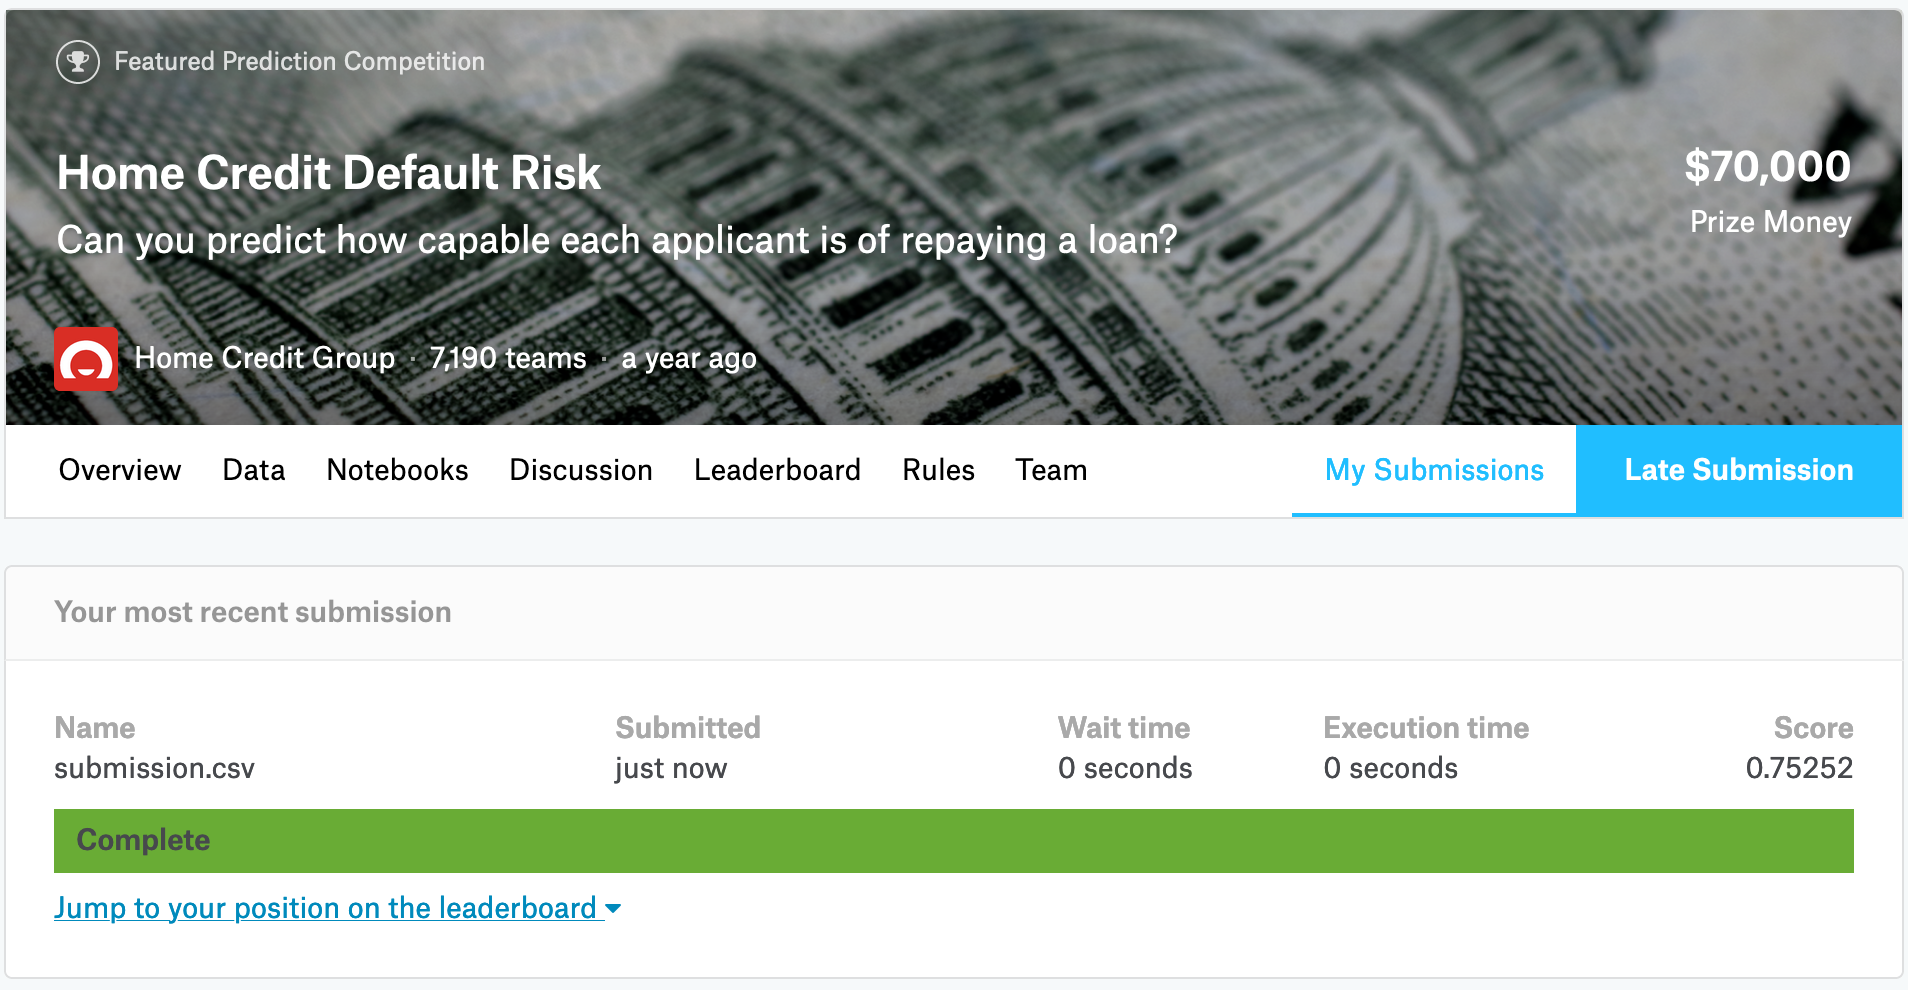

# Write-up 
For this phase of the project, you will need to submit a write-up summarizing the work you did. 
The write-up form is available on Canvas (Modules-> Module 12.1 - Course Project - Home Credit Default Risk (HCDR)-> FP Phase 2 (HCDR) : write-up form ). It has the following sections: 
## Abstract
Please provide an abstract summarizing the work you did (150 words)
## Introduction
## Feature Engineering and transformers
Please explain the work you conducted on feature engineering and transformers. 
Please include code sections when necessary as well as images or any relevant material
## Pipelines
Please explain the pipelines you created for this project and how you used them
Please include code sections when necessary as well as images or any relevant material
## Experimental results
Please present the results of the various experiments that you conducted. The results should be shown in a table or image. Try to include the different details for each experiment.  

Please include code sections when necessary as well as images or any relevant material
## Discussion
Discuss  & analyze your different experimental results  

Please include code sections when necessary as well as images or any relevant material
## Conclusion
## Kaggle Submission
Please provide a screenshot of your best kaggle submission.   
The screenshot should show the different details of the submission and not just the score.

# References

Some of the material in this notebook has been adopted from [here](https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction/notebook)
